# Does inequality exist in Real estate?

The purpose of this research is to investigate there are any inequal problem in real estate.

For the more, this research is inspired by JF which studied about inequality in credit appraisal.

So, we will investigate the inequality in real estate by analyzing the housing prices according to higher degree level.

The research procedure is as follows:

1. Comparing linear model with nonlinear model.

2. Select the target region.

- We select this area because ...

3. The criteria will be "Higher degree" similar to "Race".

4. The variables are same with Ahn et al. (2020).

[['Spring', 'Fall', 'Winter',
       'Size of unit', 'Condominium price', 'Floor', 'Construction year',
       'Network distance to nearest subway station', 'Number of households',
       'Parking space per household', 'Heating type',
       'Number of top university entrants',
       'Network distance to the CBD', 'Network distance to nearest greenspace',
       'Network distance to nearest waterfront', 'Number of bus stops',
       'Population density',
       'Ratio of adults with higher degrees']]

# Import libraries & data

In [1]:
!pip install pdpbox
from pdpbox import info_plots
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from pdpbox import info_plots
import xgboost

def setting(area):
  df = pd.read_excel('/content/drive/MyDrive/Data storage/prices_'+area+'.xlsx')
  df = df[['Spring', 'Fall', 'Winter', 'Longitude', 'Latitude',
       'Size of unit', 'Condominium price', 'Floor', 'Construction year',
       'Network distance to nearest subway station', 'Number of households',
       'Parking space per household', 'Heating type',
       'Number of top university entrants',
       'Network distance to the CBD', 'Network distance to nearest greenspace',
       'Network distance to nearest waterfront', 'Number of bus stops',
       'Population density',
       'Ratio of adults with higher degrees']]

  df.columns =['Spring','Fall','Winter','x','y','Area','Price','Floor','Year','Dist. Subway','Households','Parking',
               'Heating','Top Univ.','Dist. CBD','Dist. Green','Dist. Water','Bus Stops','Pop. Density','Higher Degree']
  df['Price'] = df['Price'].replace(0,1)
  df['Dist. Subway'] = df['Dist. Subway'].replace(0,1)
  df['Dist. Green'] = df['Dist. Green'].replace(0,1)
  df['Dist. Water'] = df['Dist. Water'].replace(0,1)  
  df['Price'] = np.log(df['Price'])
  df['Dist. Subway'] = np.log(df['Dist. Subway'])
  df['Dist. Green'] = np.log(df['Dist. Green'])
  df['Dist. Water'] = np.log(df['Dist. Water'])

  train, test = train_test_split(df, random_state= 2022314397, test_size = 0.3)
  rf = RandomForestRegressor()
  xgb = xgboost.XGBRegressor()
  rf.fit(train.drop(['x','y','Price'],axis=1), train['Price'])
  xgb.fit(train.drop(['x','y','Price'],axis=1), train['Price'])

  test_rf = pd.DataFrame(rf.predict(test.drop(['x','y','Price'],axis=1)))
  test_rf.columns = ['Price']
  train_rf = pd.DataFrame(rf.predict(train.drop(['x','y','Price'],axis=1)))
  train_rf.columns =['Price']
  df_rf = pd.DataFrame(rf.predict(df.drop(['x','y','Price'],axis=1)))
  df_rf.columns = ['Price']

  test_xgb = pd.DataFrame(xgb.predict(test.drop(['x','y','Price'],axis=1)))
  test_xgb.columns = ['Price']
  train_xgb = pd.DataFrame(xgb.predict(train.drop(['x','y','Price'],axis=1)))
  train_xgb.columns =['Price']  
  df_xgb = pd.DataFrame(xgb.predict(df.drop(['x','y','Price'],axis=1)))
  df_xgb.columns = ['Price']

  train['Predict_rf'] = train_rf['Price']
  test['Predict_rf'] = test_rf['Price']
  df['Predict_rf'] = df_rf['Price']

  train['Predict_xgb'] = train_xgb['Price']
  test['Predict_xgb'] = test_xgb['Price']
  df['Predict_xgb'] = df_xgb['Price']

  df.to_excel('/content/drive/MyDrive/다운로드/0318_'+area+' df.xlsx')
  train.to_excel('/content/drive/MyDrive/다운로드/0318_'+area+' train.xlsx')
  test.to_excel('/content/drive/MyDrive/다운로드/0318_'+area+' test.xlsx')
  return df, train, test, rf, xgb

     |████████████████████████████████| 34.0 MB 140 kB/s 
     |████████████████████████████████| 13.1 MB 36.3 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=18a86f0d27caf5321230dd7e0b30b560527bf853c9c0fb60cf14b19af6bd734d
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


## Price distribution according to "Higher degree".

1. Full dataset

2. Predict value by RF

- train, test

3. Predict value by XGBoost

- train, test

## Busan

[10:19:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/pdpbox/info_plot_utils.py:179: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(width, height))
/usr/local/lib/python3.7/dist-packages/pdpbox/info_plot_utils.py:179: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(width, height))
/usr/local/lib/python3.7/dist-packages/pdpbox/info_plot_utils.py:179: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly close

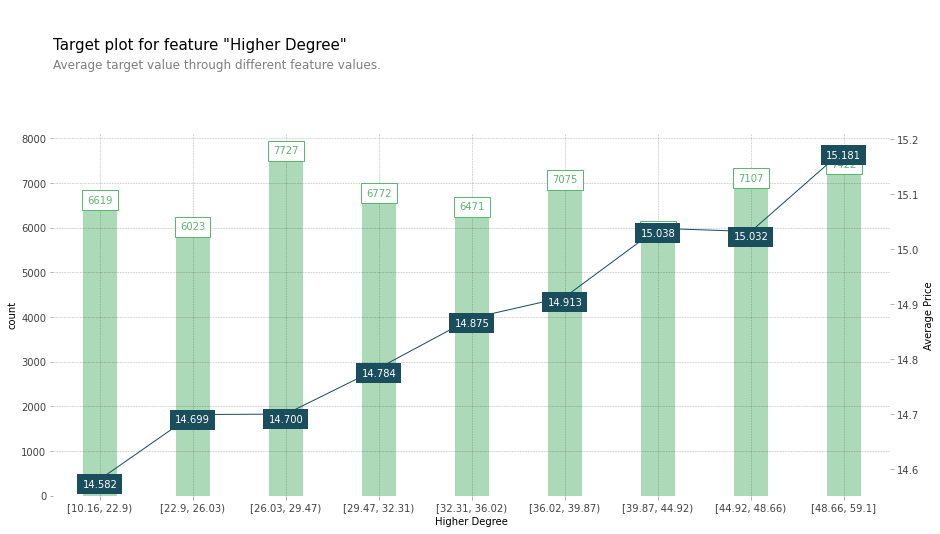

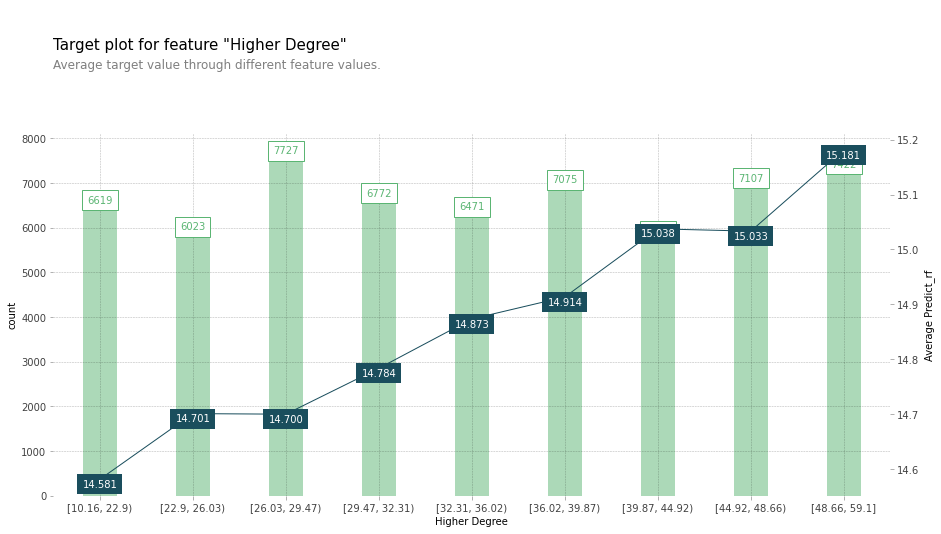

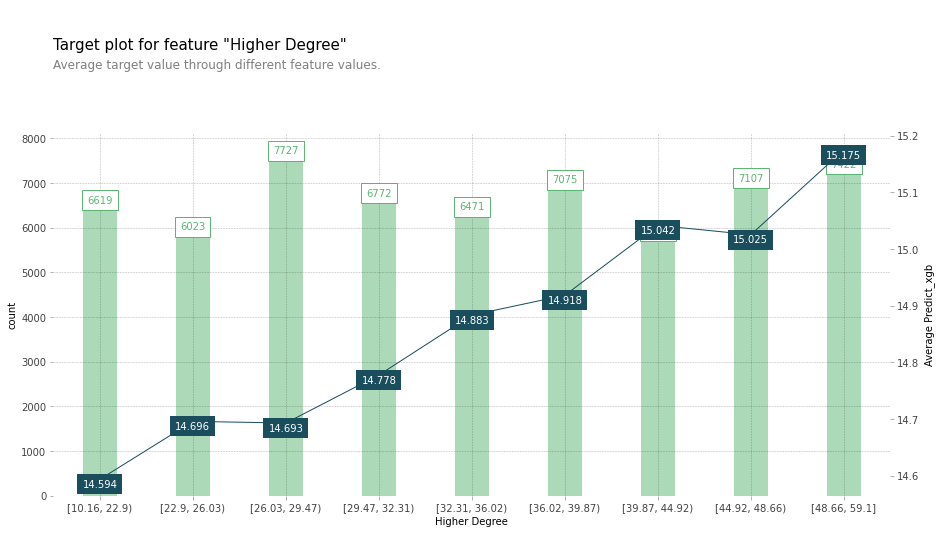

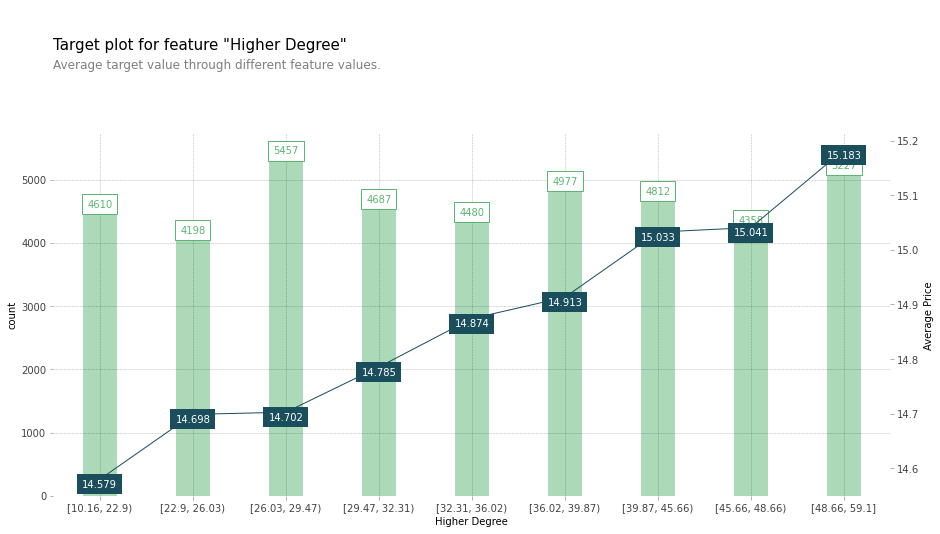

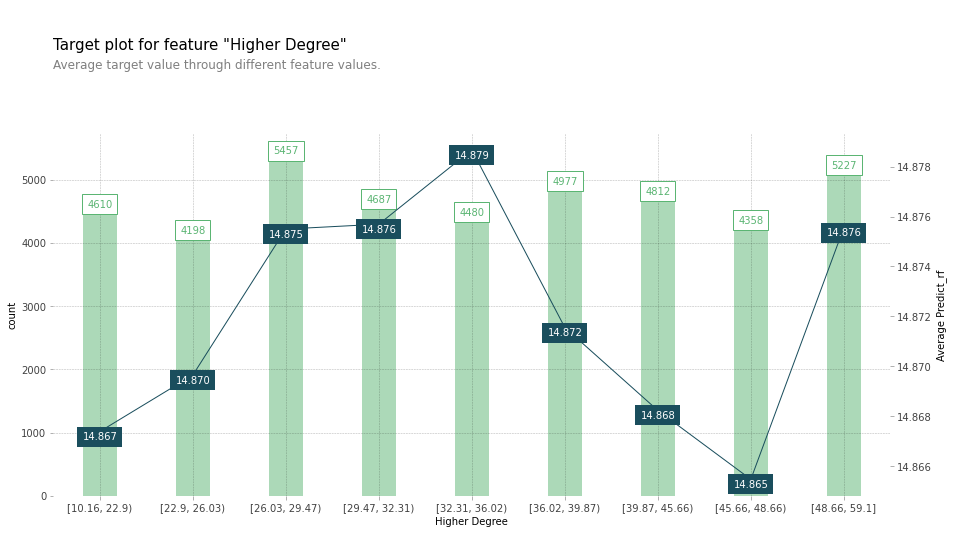

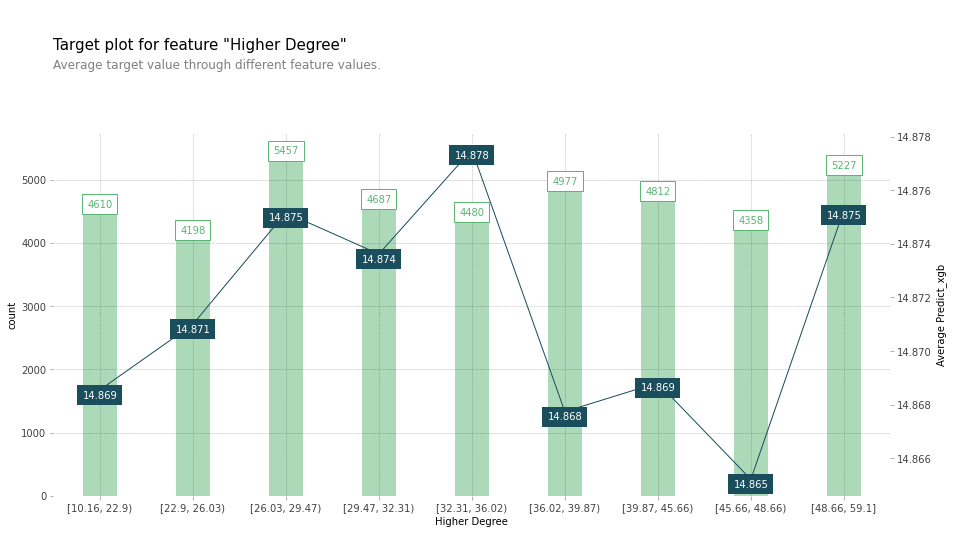

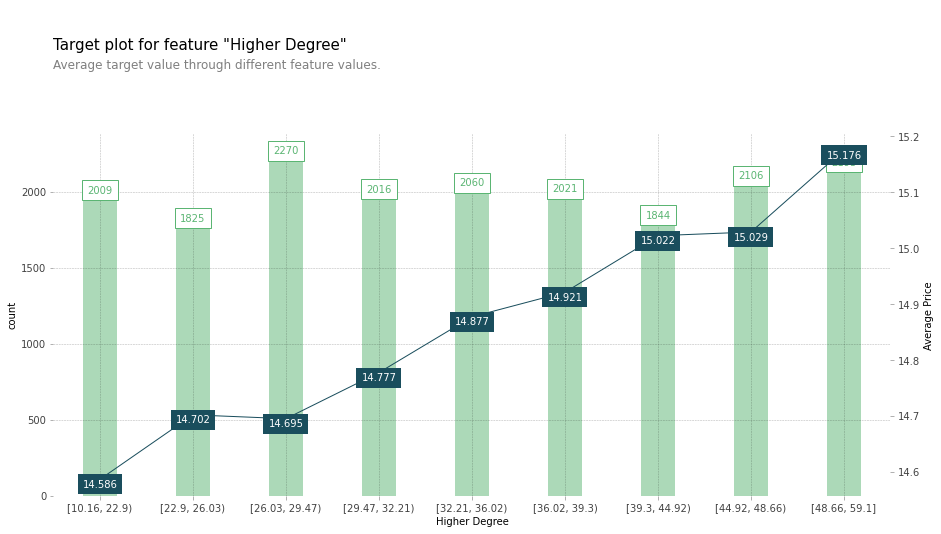

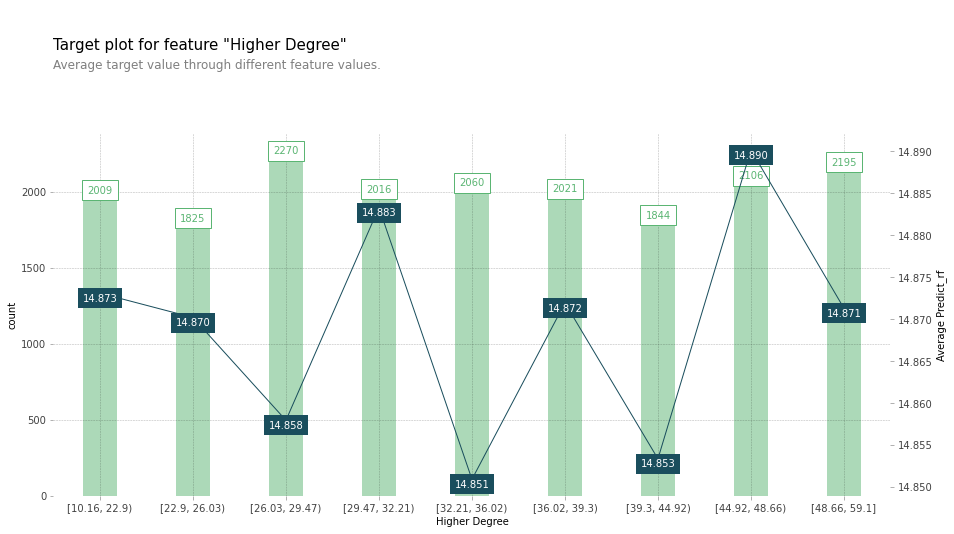

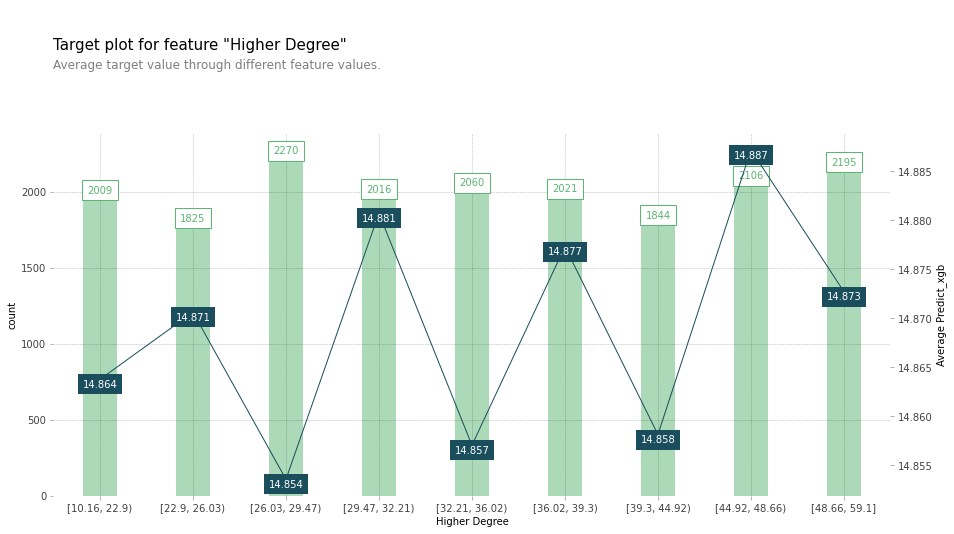

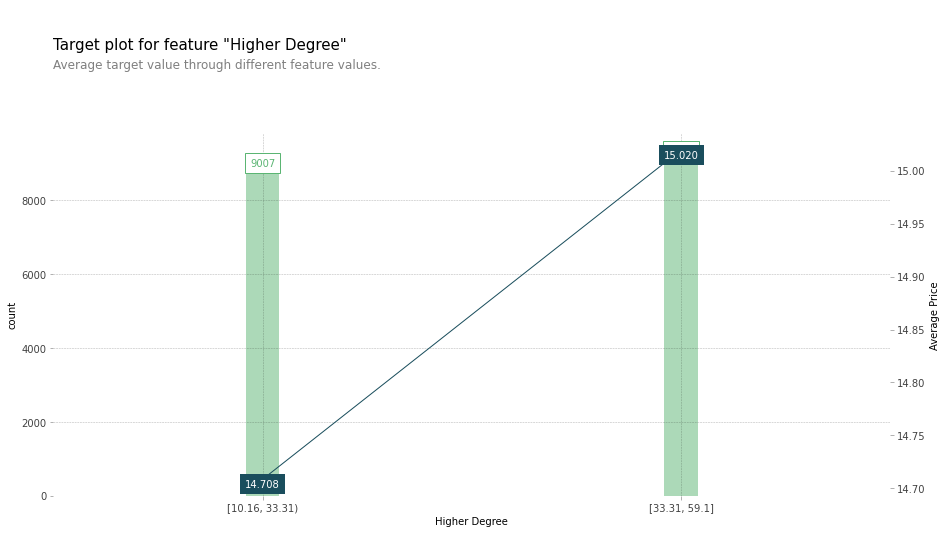

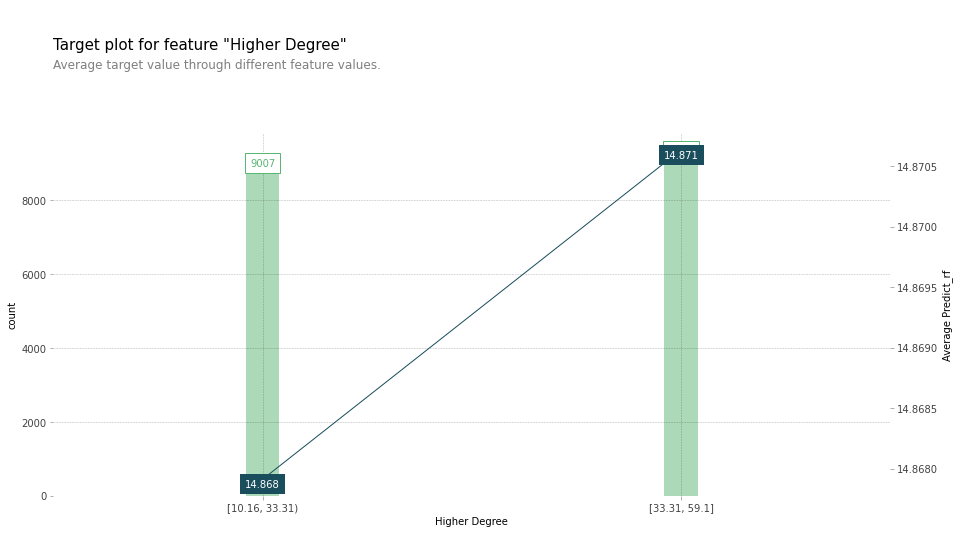

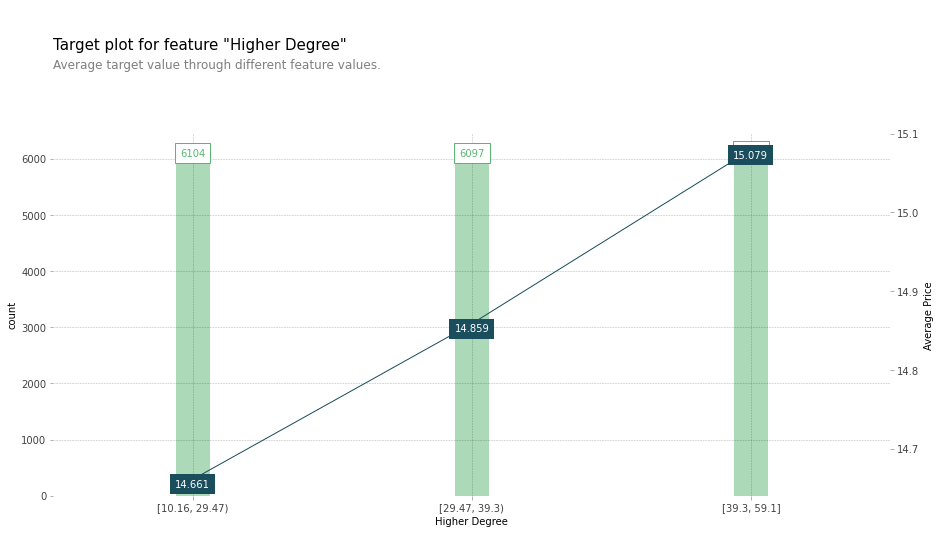

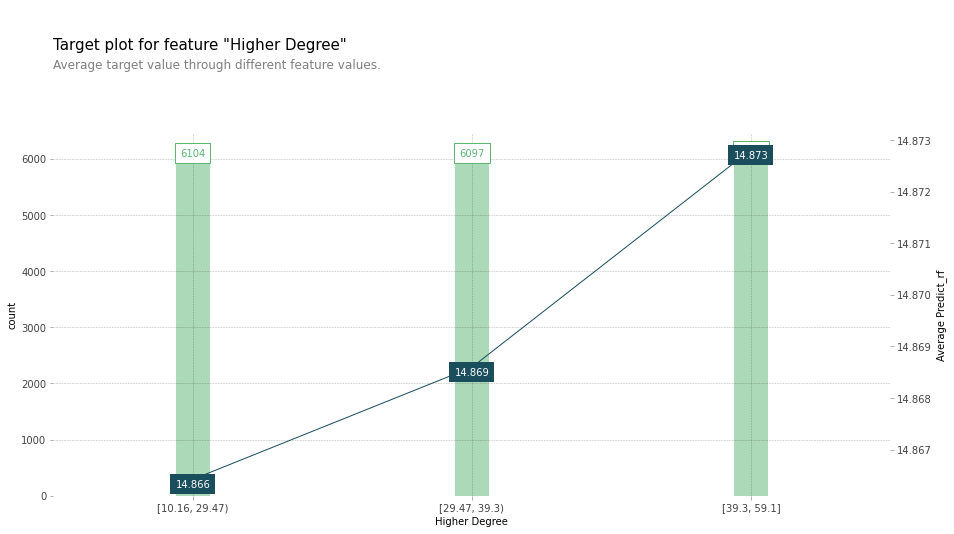

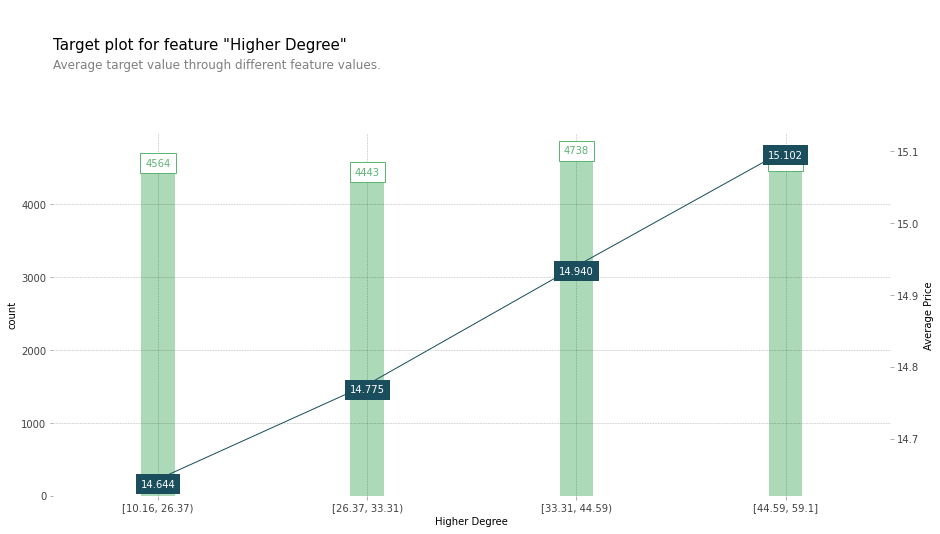

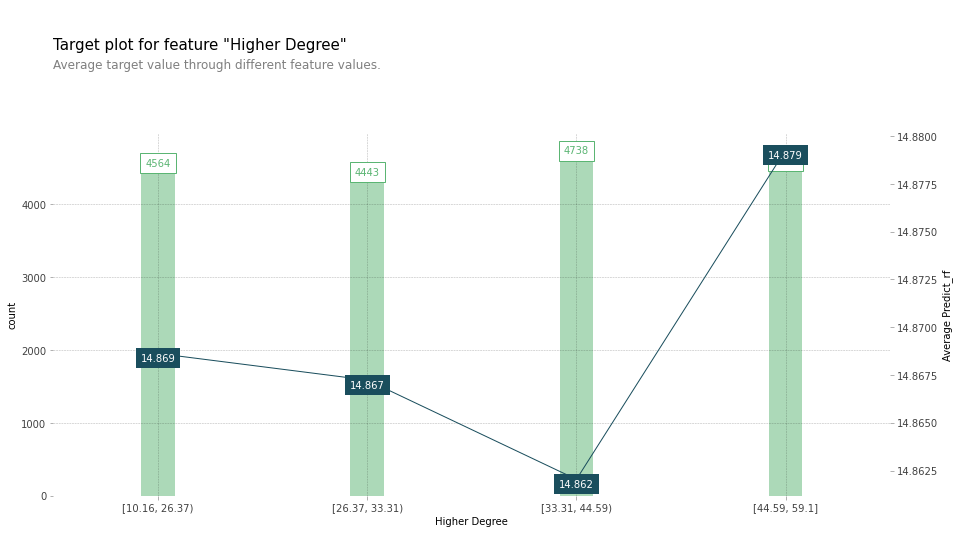

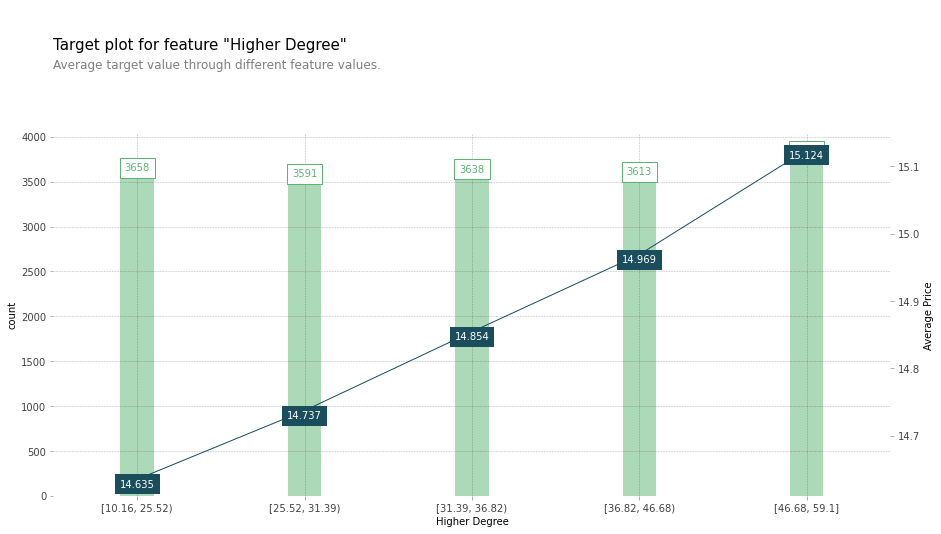

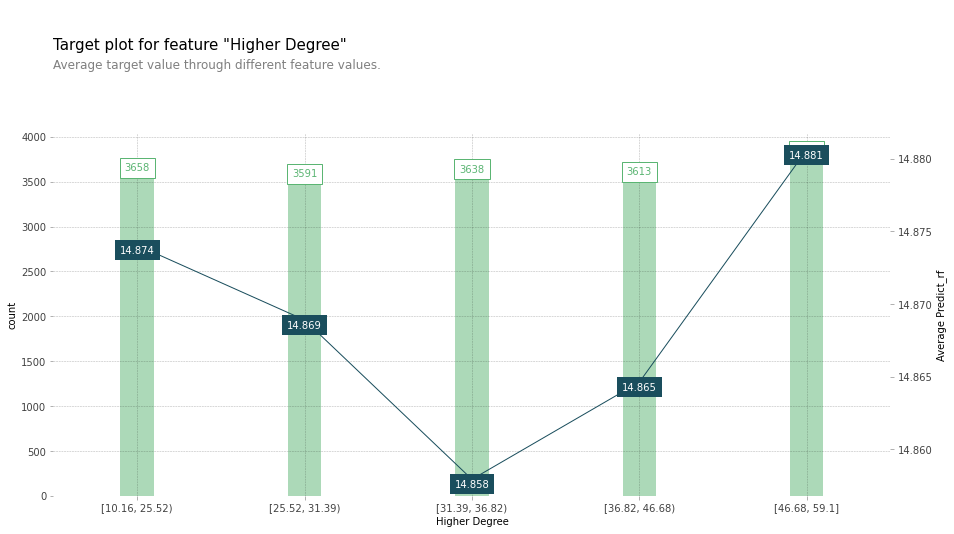

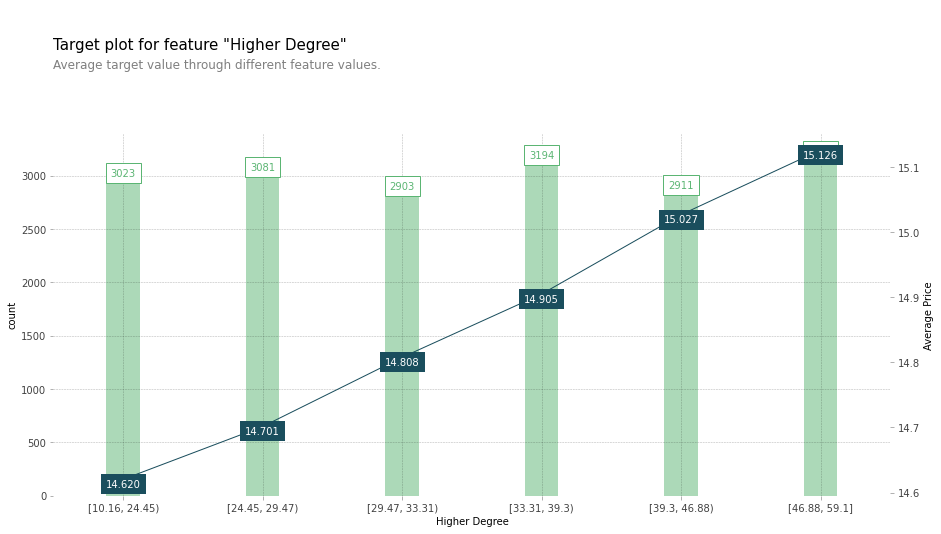

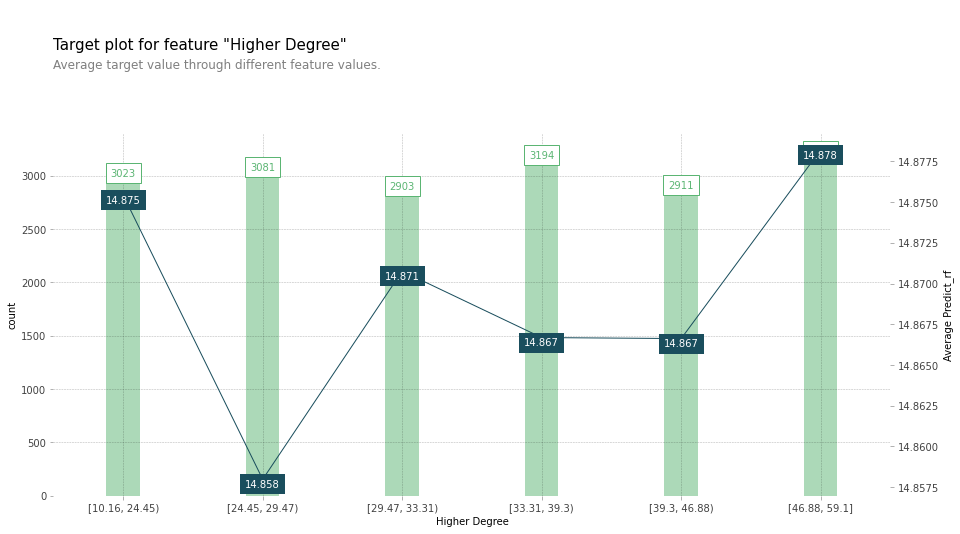

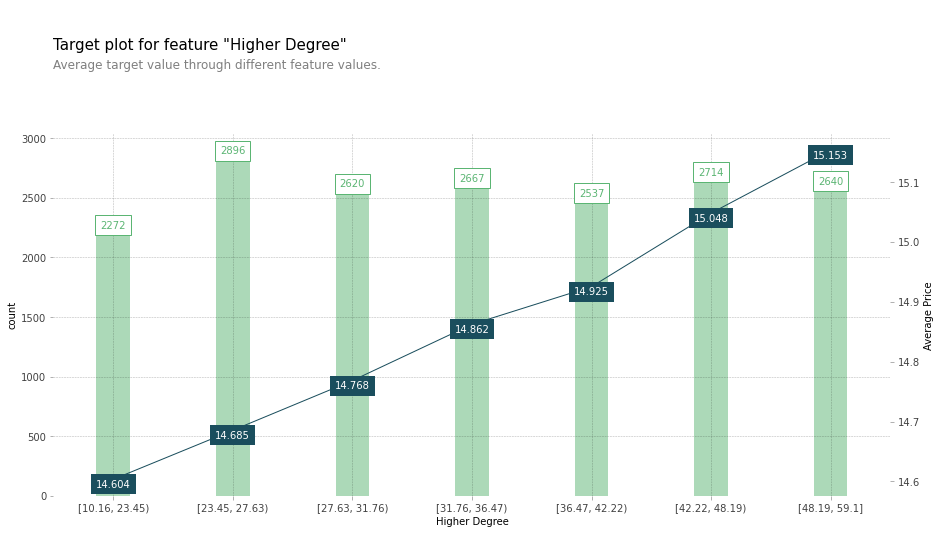

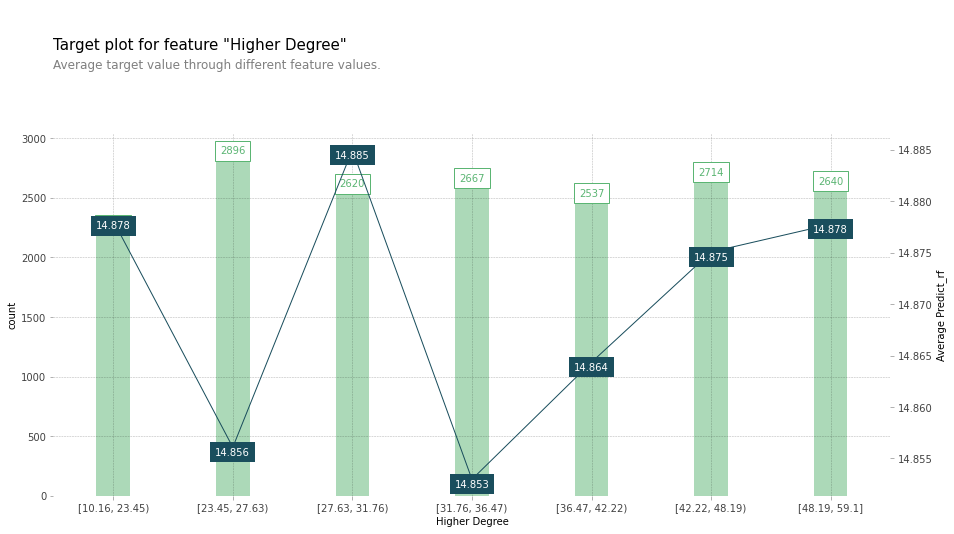

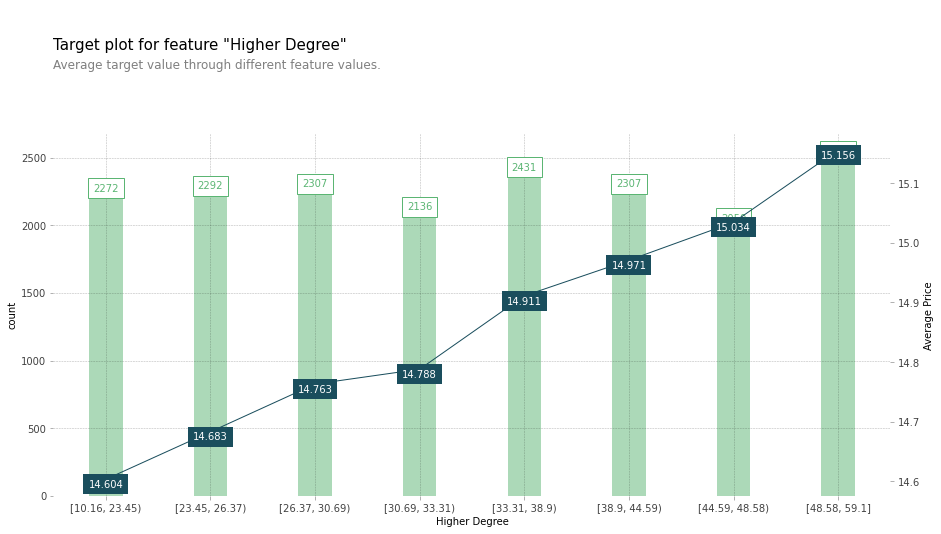

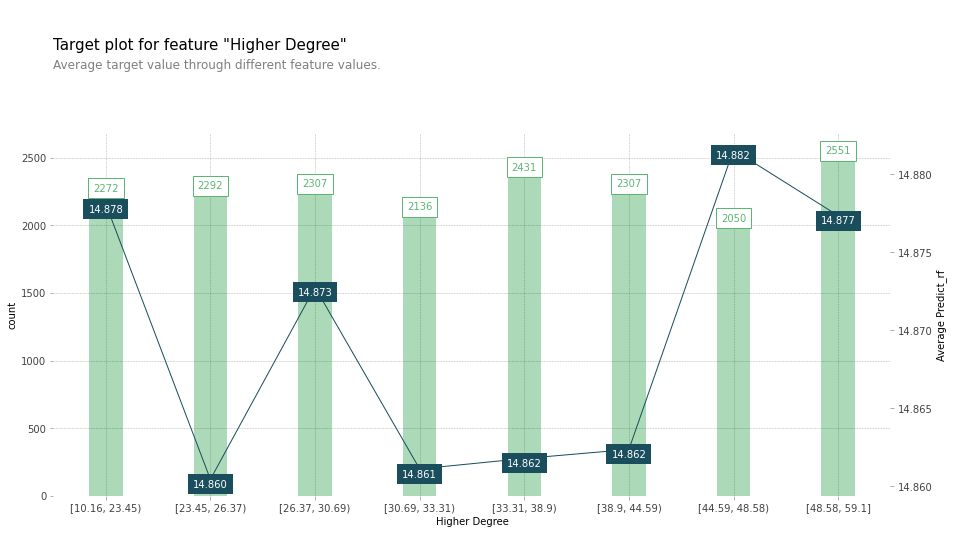

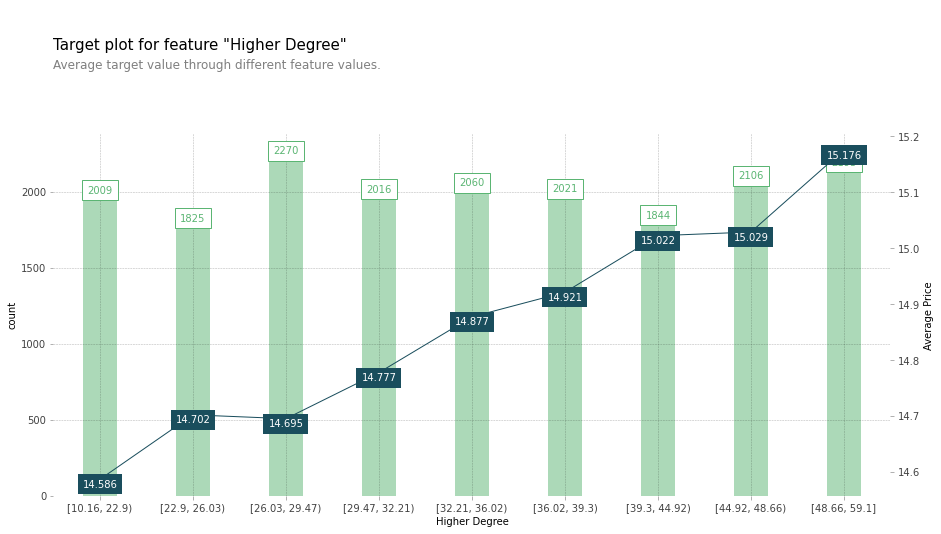

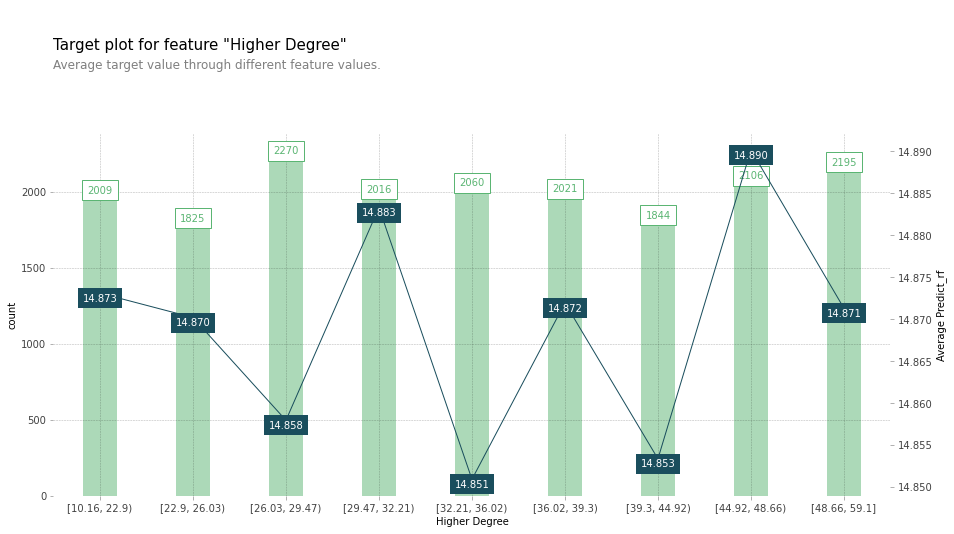

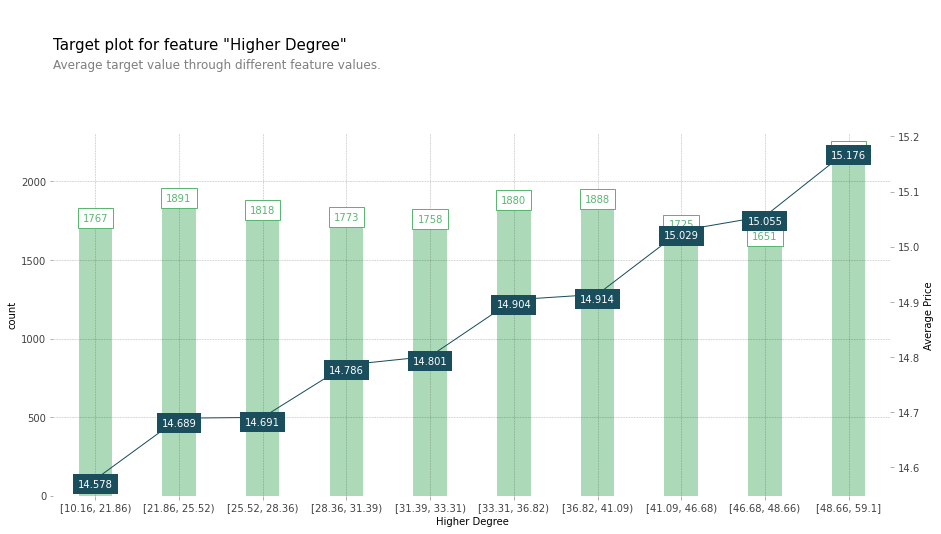

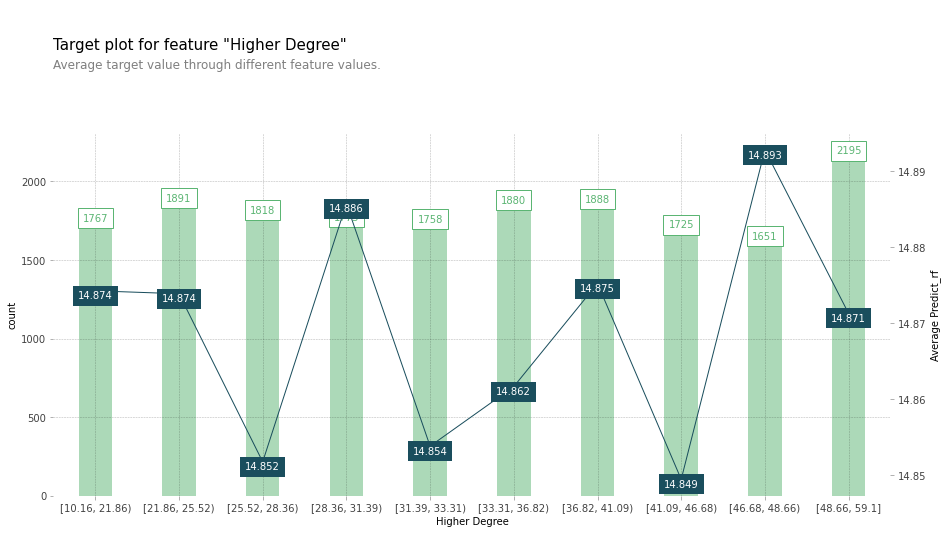

In [4]:
df, train, test, rf, xgb = setting('busan')
#===== Full dataset =====#
fig, axes, summary_df = info_plots.target_plot(
    df = df, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price' # 타겟
)

fig, axes, summary_df = info_plots.target_plot(
    df = df, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf' # 타겟
)

fig, axes, summary_df = info_plots.target_plot(
    df = df, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_xgb' # 타겟
)

#===== Train dataset =====#
fig, axes, summary_df = info_plots.target_plot(
    df = train, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price' # 타겟
)

fig, axes, summary_df = info_plots.target_plot(
    df = train, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf' # 타겟
)

fig, axes, summary_df = info_plots.target_plot(
    df = train, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_xgb' # 타겟
)

#===== Test dataset =====#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price' # 타겟
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf' # 타겟
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_xgb' # 타겟
)

#===== Test dataset with 2 or 3 interval =====#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price', # 타겟
    num_grid_points= 3
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf', # 타겟
    num_grid_points= 3
)

#=============================================#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price', # 타겟
    num_grid_points= 4
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf', # 타겟
    num_grid_points= 4
)

#=============================================#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price', # 타겟
    num_grid_points= 5
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf', # 타겟
    num_grid_points= 5
)

#=============================================#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price', # 타겟
    num_grid_points= 6
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf', # 타겟
    num_grid_points= 6
)

#=============================================#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price', # 타겟
    num_grid_points= 7
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf', # 타겟
    num_grid_points= 7
)

#=============================================#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price', # 타겟
    num_grid_points= 8
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf', # 타겟
    num_grid_points= 8
)

#=============================================#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price', # 타겟
    num_grid_points= 9
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf', # 타겟
    num_grid_points= 9
)

#=============================================#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price', # 타겟
    num_grid_points= 10
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf', # 타겟
    num_grid_points= 10
)

#=============================================#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price', # 타겟
    num_grid_points= 11
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf', # 타겟
    num_grid_points= 11
)

## Daegu

[10:21:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/pdpbox/info_plot_utils.py:179: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(width, height))
/usr/local/lib/python3.7/dist-packages/pdpbox/info_plot_utils.py:179: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(width, height))
/usr/local/lib/python3.7/dist-packages/pdpbox/info_plot_utils.py:179: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly close

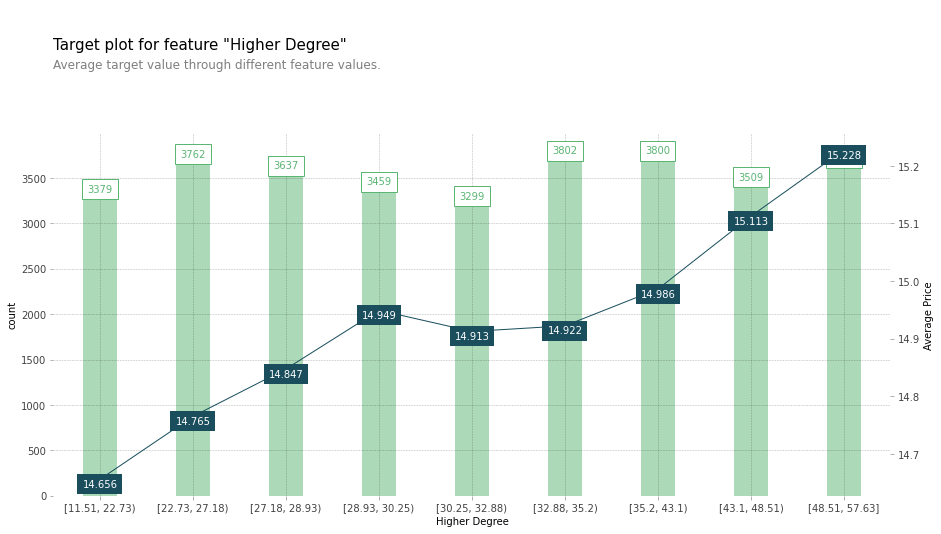

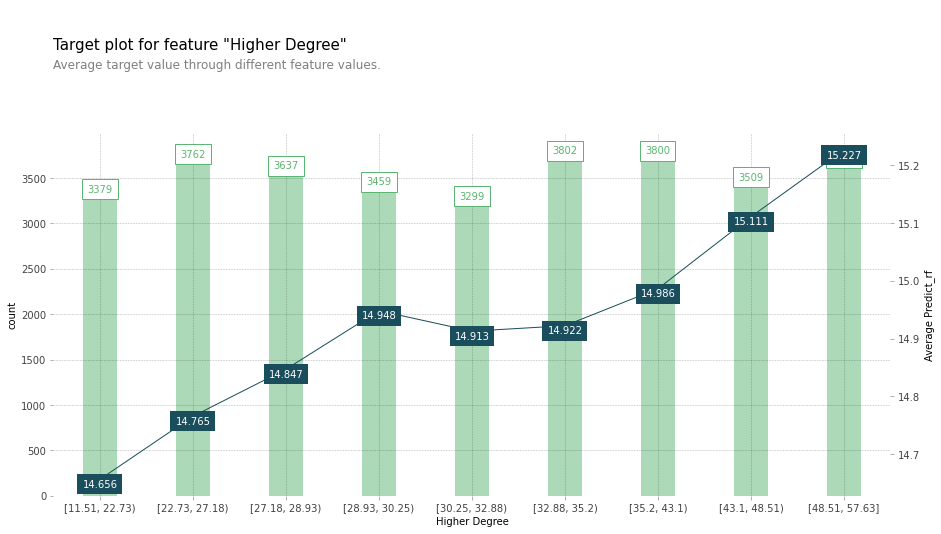

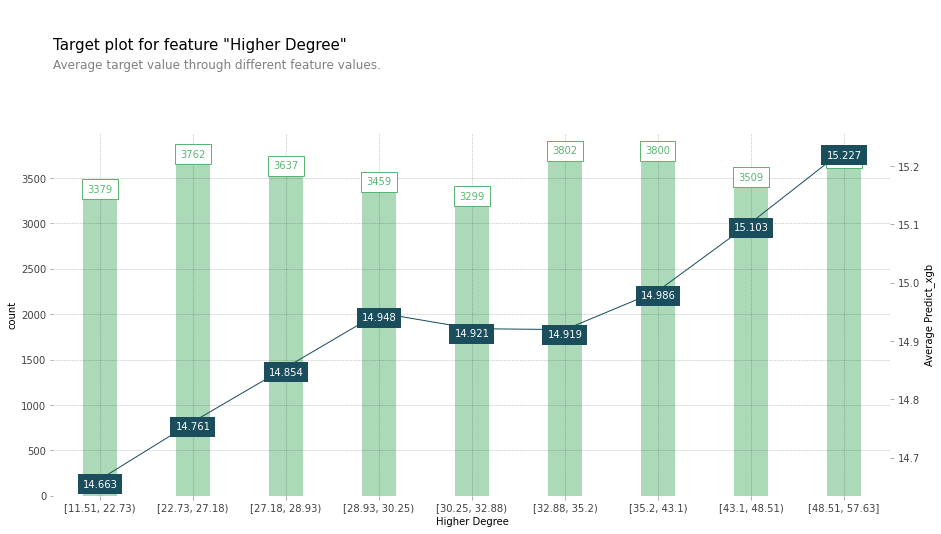

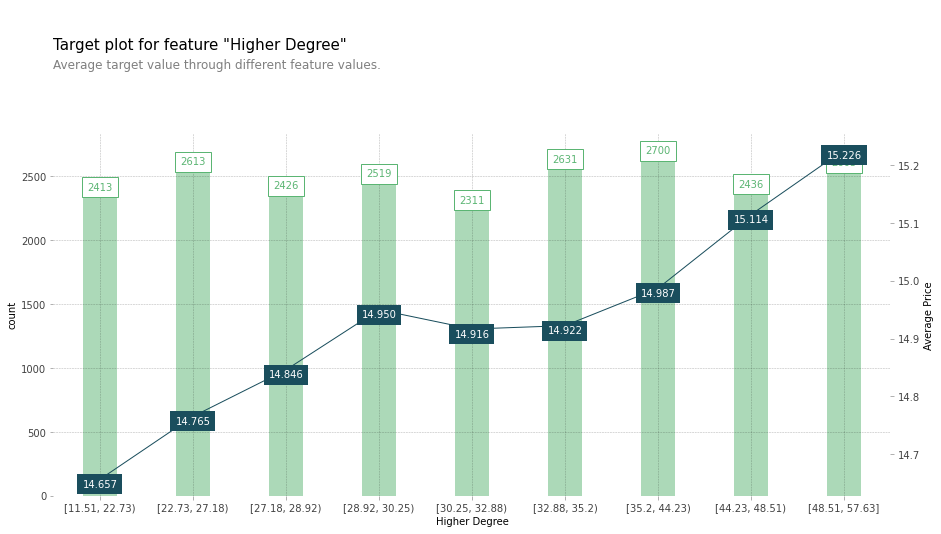

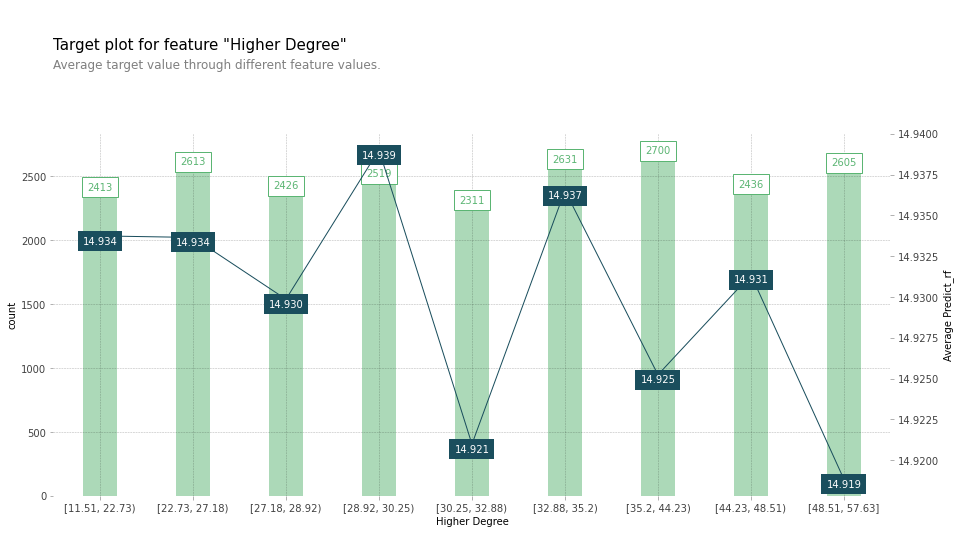

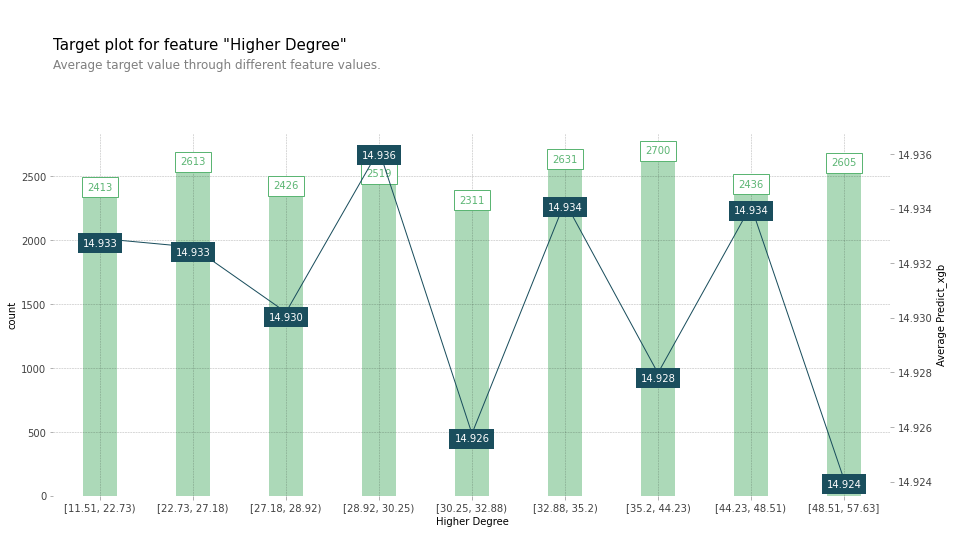

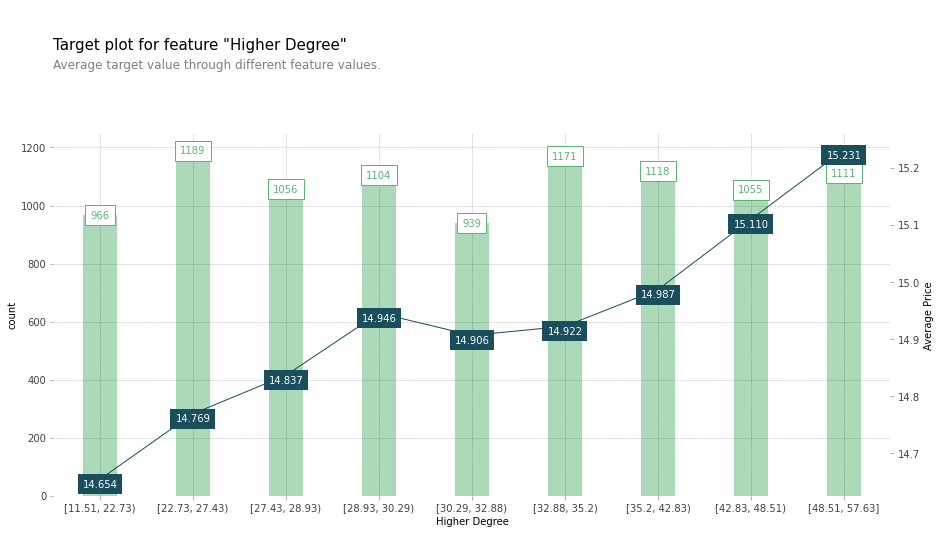

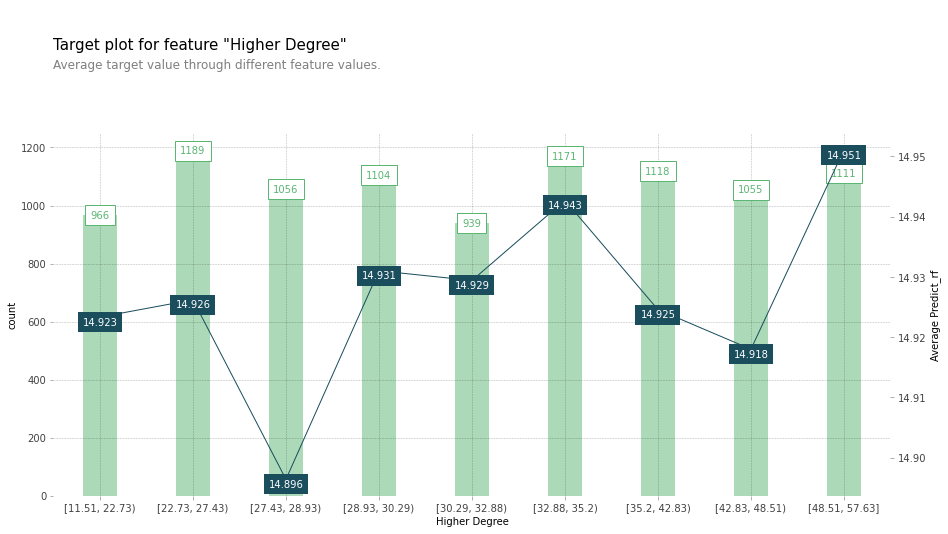

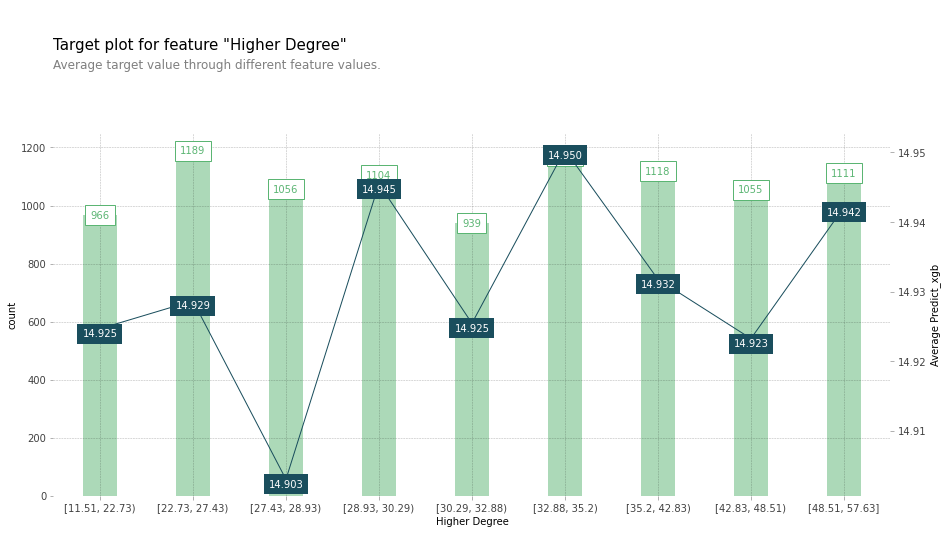

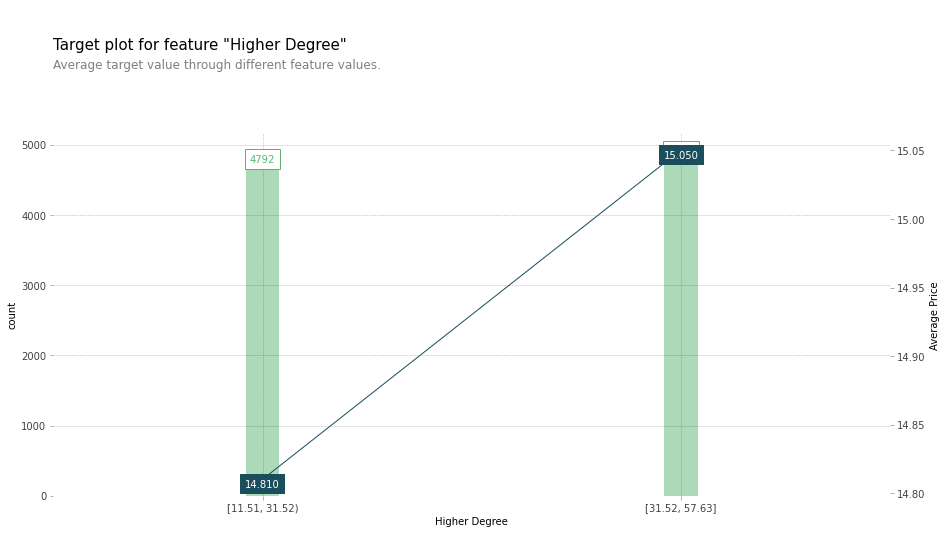

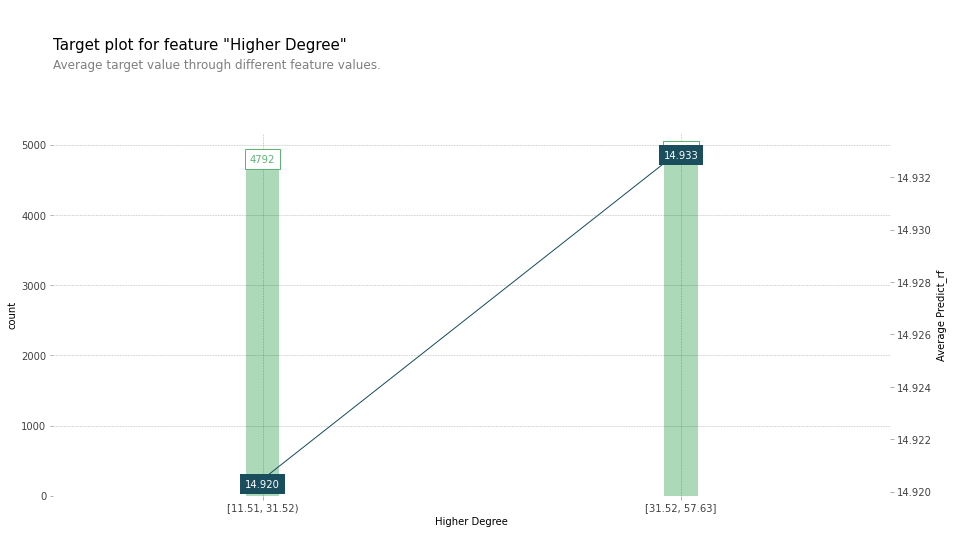

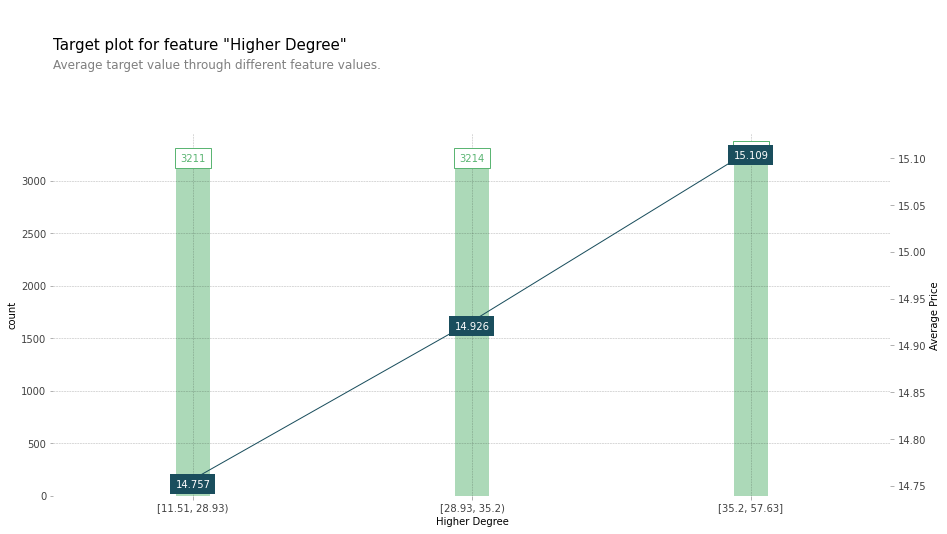

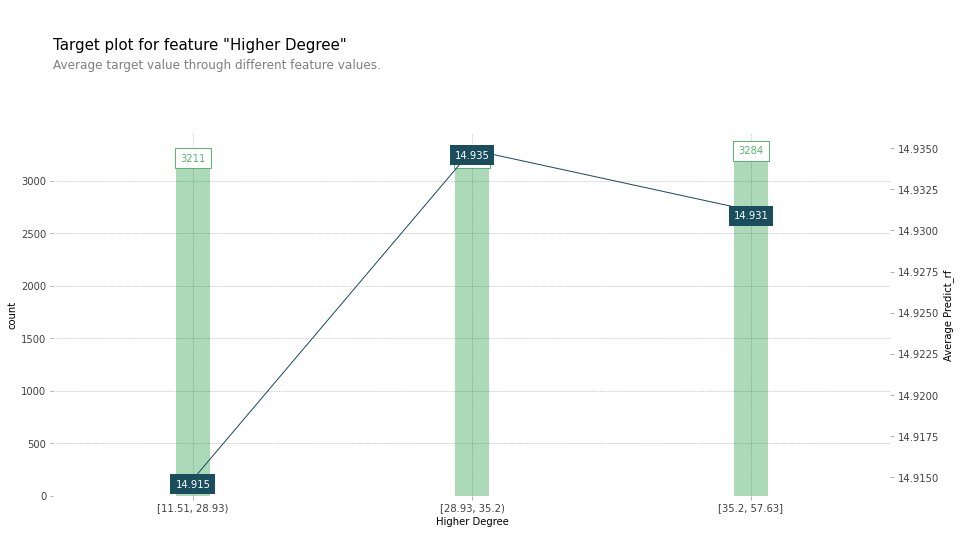

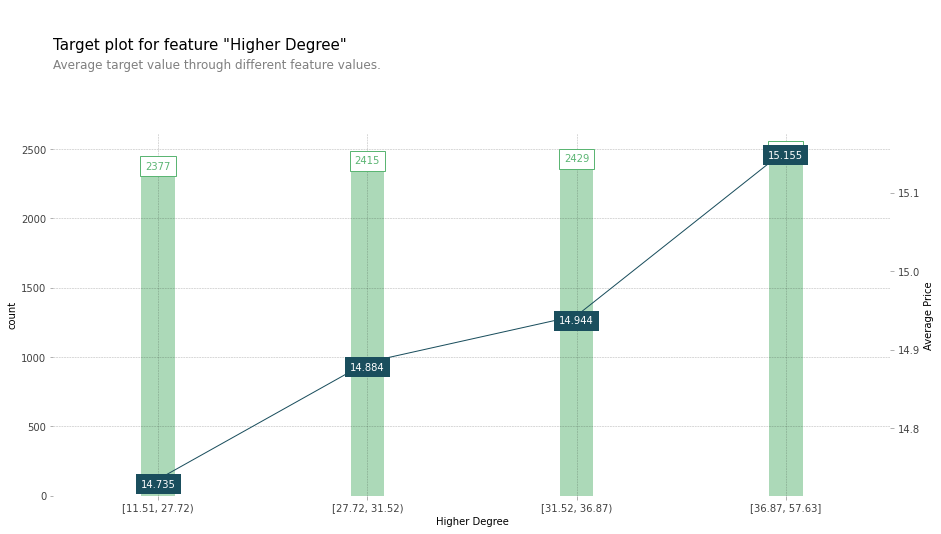

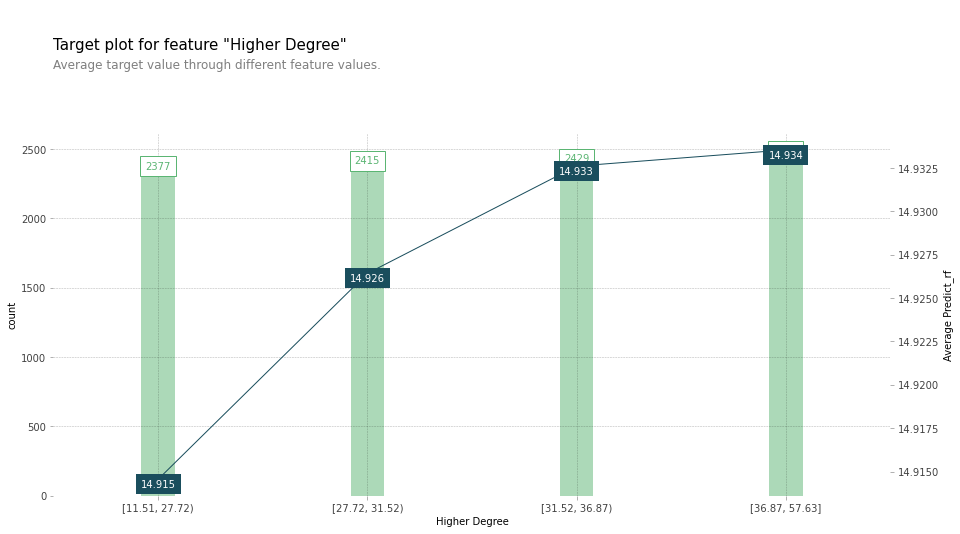

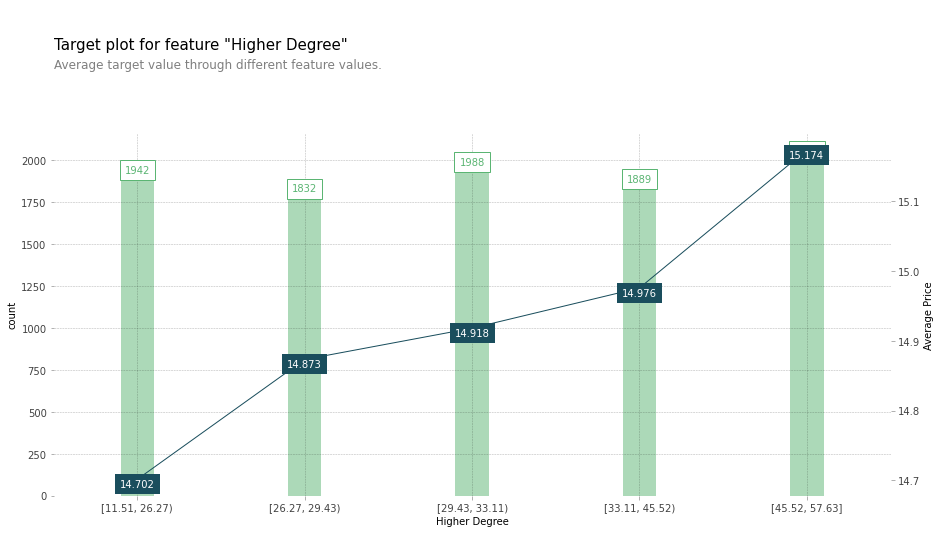

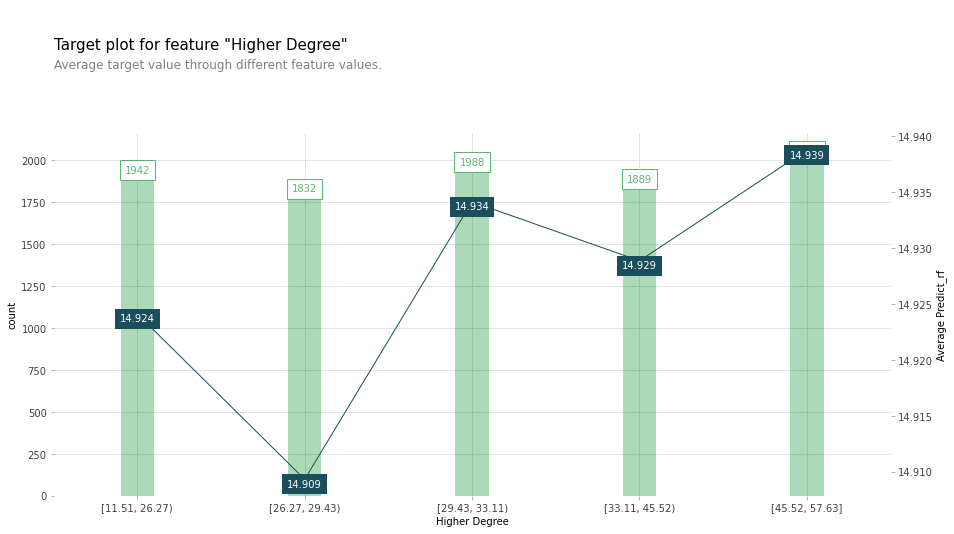

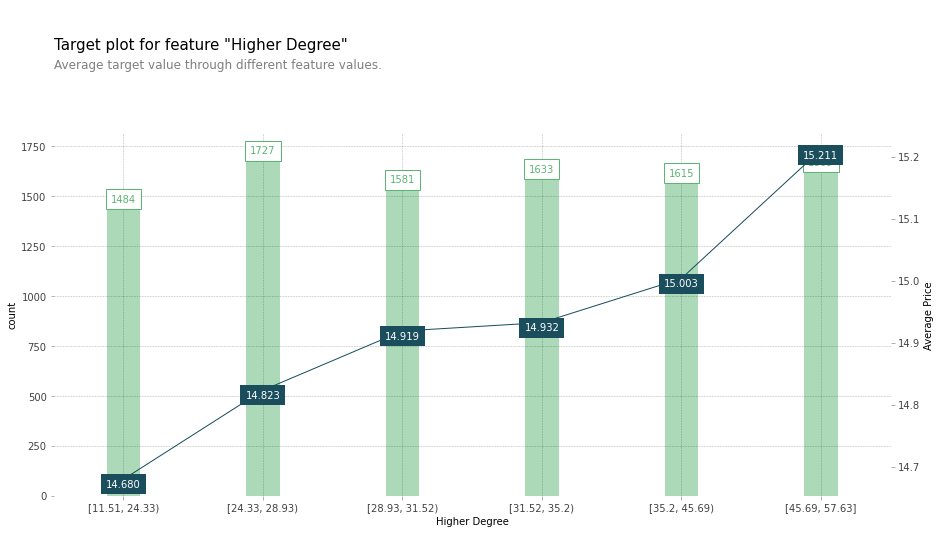

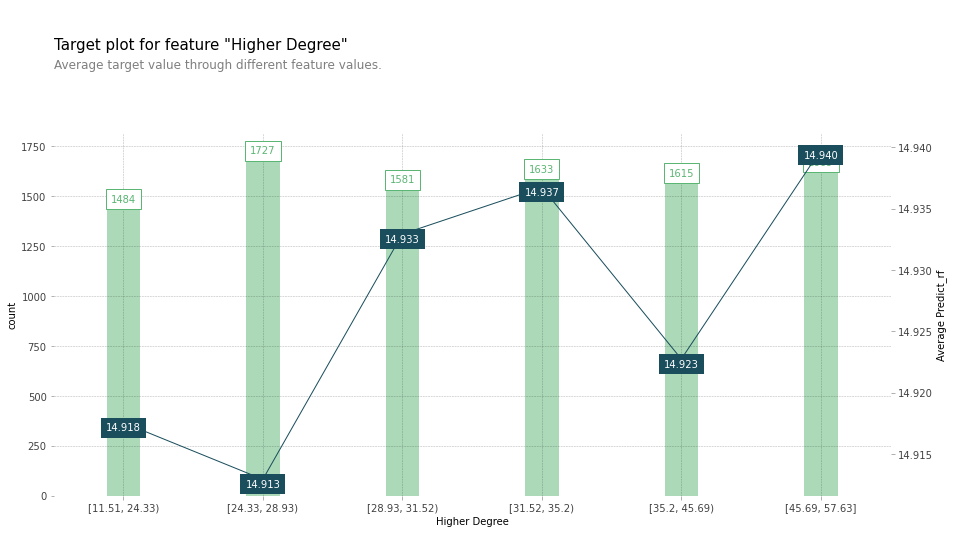

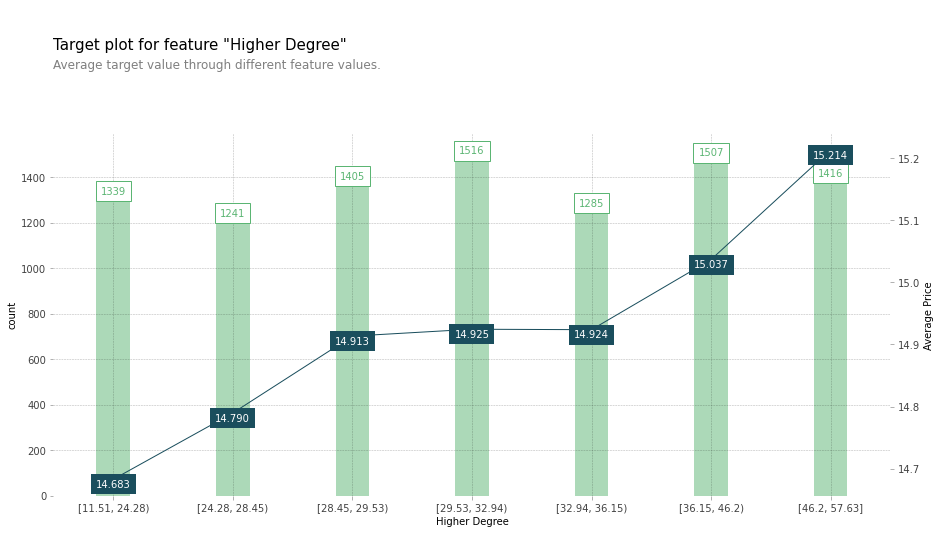

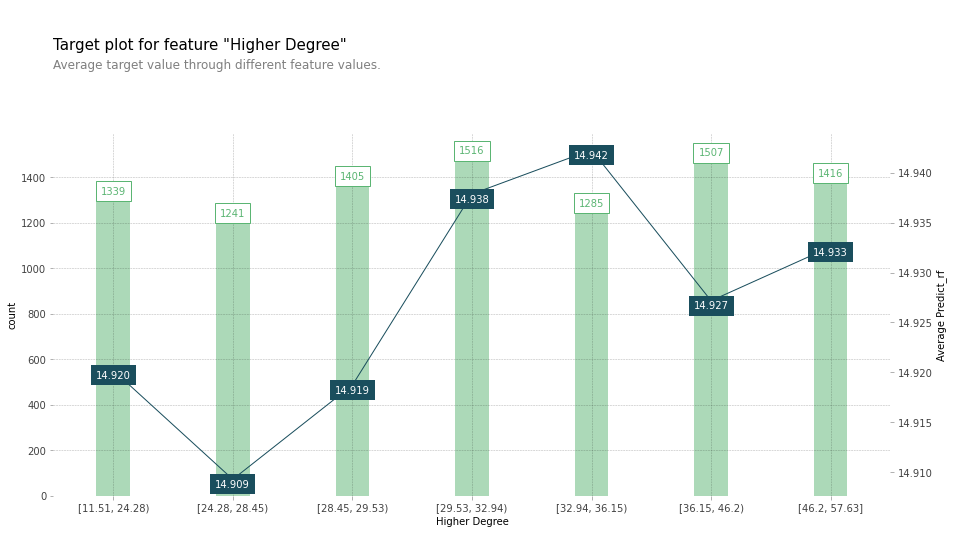

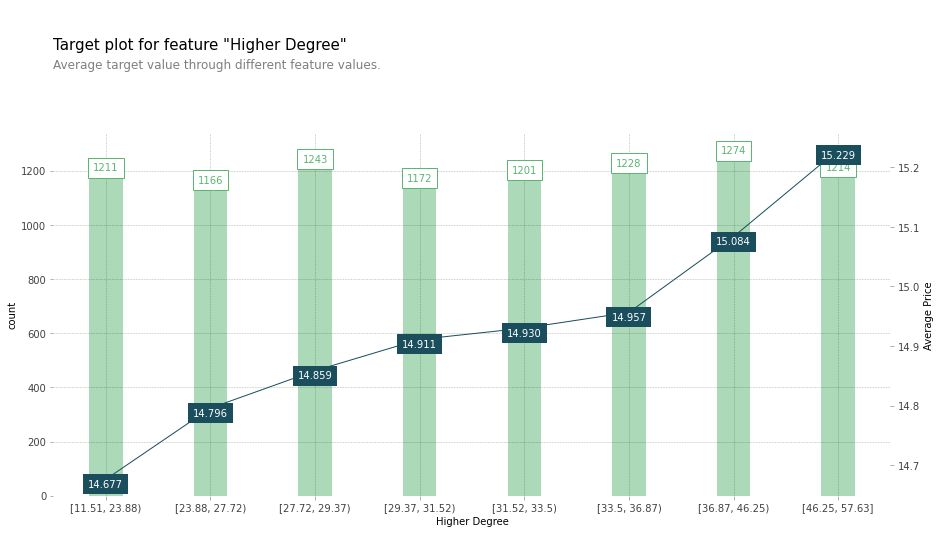

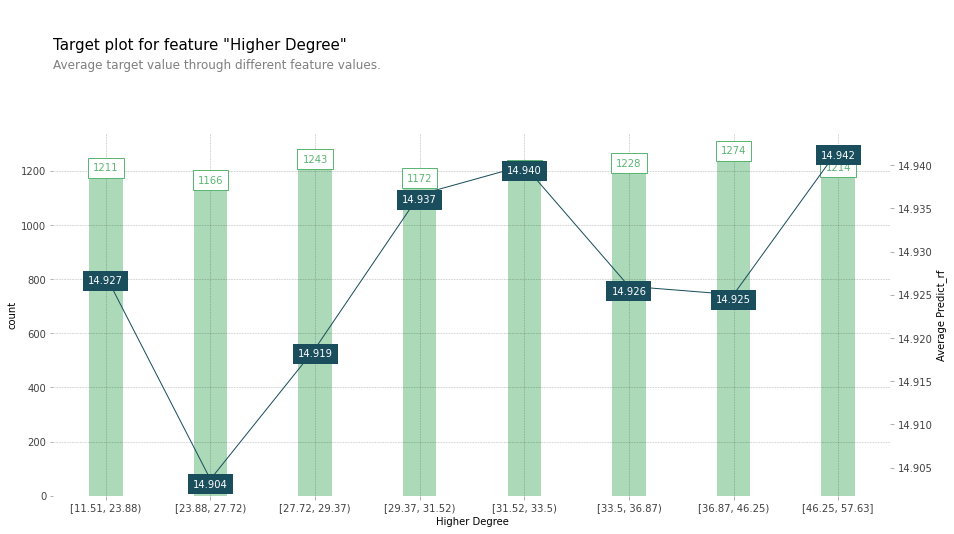

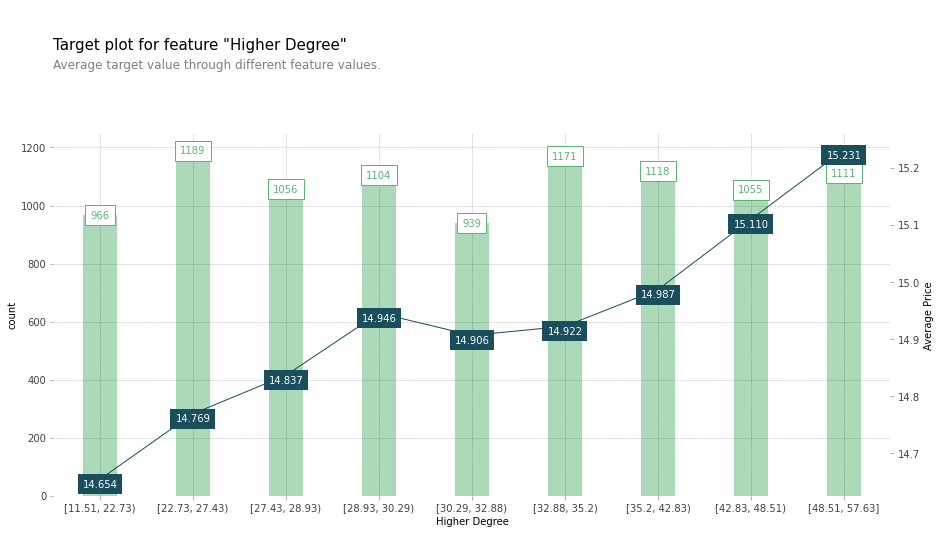

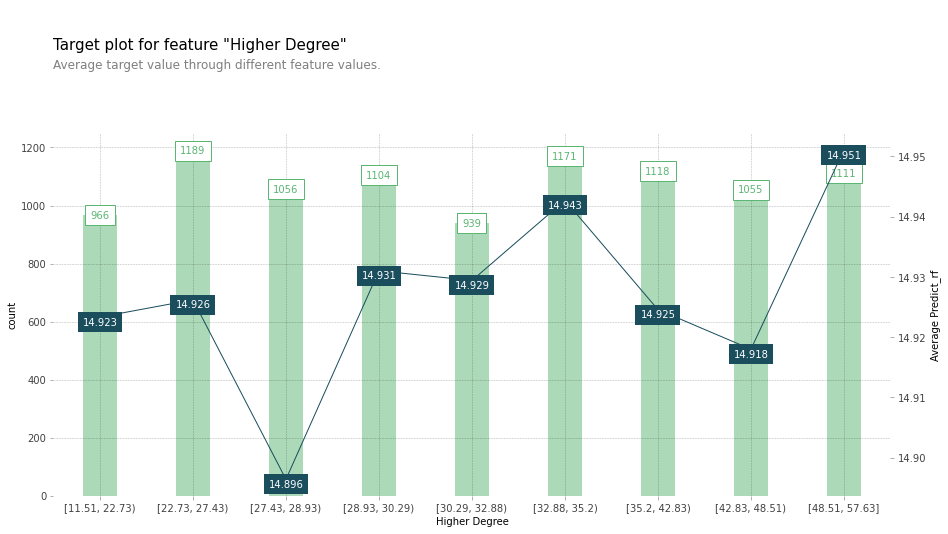

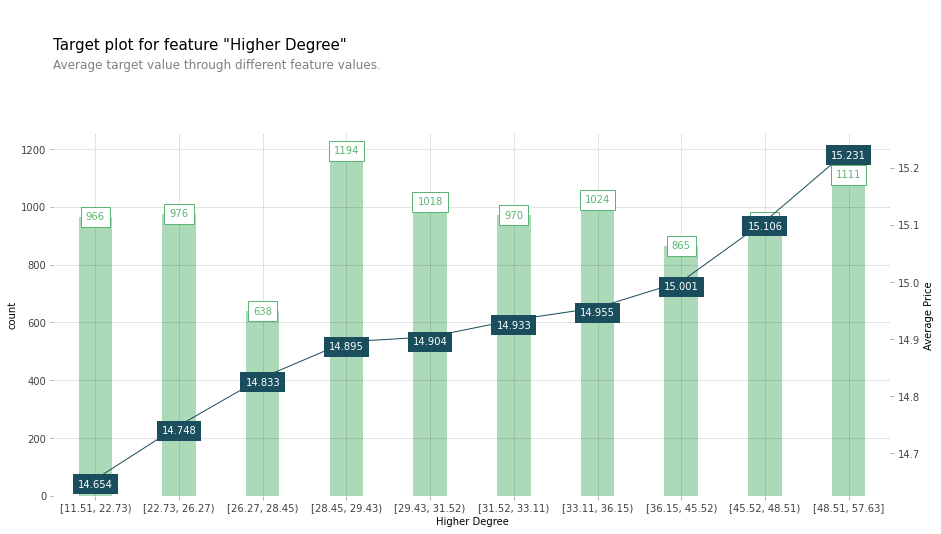

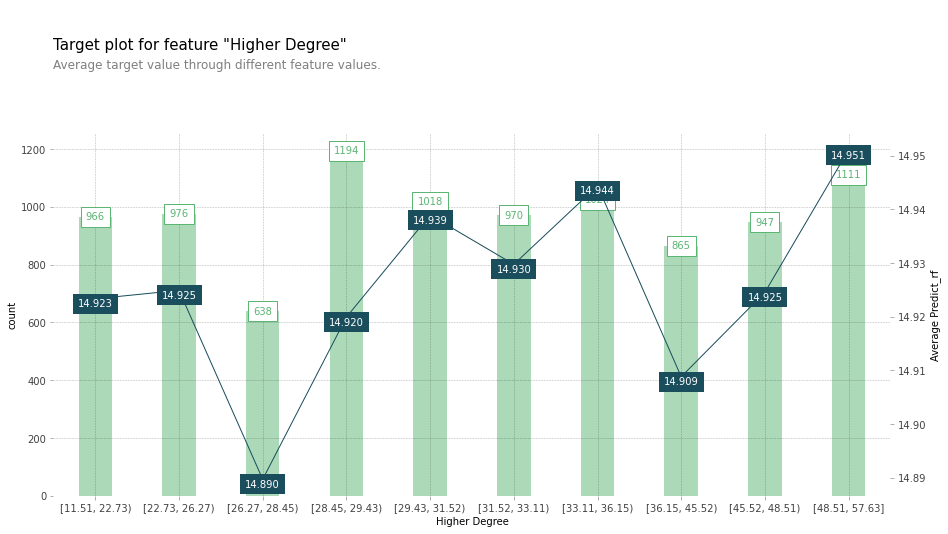

In [5]:
df, train, test, rf, xgb = setting('daegu')
#===== Full dataset =====#
fig, axes, summary_df = info_plots.target_plot(
    df = df, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price' # 타겟
)

fig, axes, summary_df = info_plots.target_plot(
    df = df, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf' # 타겟
)

fig, axes, summary_df = info_plots.target_plot(
    df = df, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_xgb' # 타겟
)

#===== Train dataset =====#
fig, axes, summary_df = info_plots.target_plot(
    df = train, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price' # 타겟
)

fig, axes, summary_df = info_plots.target_plot(
    df = train, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf' # 타겟
)

fig, axes, summary_df = info_plots.target_plot(
    df = train, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_xgb' # 타겟
)

#===== Test dataset =====#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price' # 타겟
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf' # 타겟
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_xgb' # 타겟
)

#===== Test dataset with 2 or 3 interval =====#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price', # 타겟
    num_grid_points= 3
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf', # 타겟
    num_grid_points= 3
)

#=============================================#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price', # 타겟
    num_grid_points= 4
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf', # 타겟
    num_grid_points= 4
)

#=============================================#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price', # 타겟
    num_grid_points= 5
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf', # 타겟
    num_grid_points= 5
)

#=============================================#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price', # 타겟
    num_grid_points= 6
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf', # 타겟
    num_grid_points= 6
)

#=============================================#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price', # 타겟
    num_grid_points= 7
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf', # 타겟
    num_grid_points= 7
)

#=============================================#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price', # 타겟
    num_grid_points= 8
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf', # 타겟
    num_grid_points= 8
)

#=============================================#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price', # 타겟
    num_grid_points= 9
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf', # 타겟
    num_grid_points= 9
)

#=============================================#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price', # 타겟
    num_grid_points= 10
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf', # 타겟
    num_grid_points= 10
)

#=============================================#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price', # 타겟
    num_grid_points= 11
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf', # 타겟
    num_grid_points= 11
)

## Daejeon

[10:23:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/pdpbox/info_plot_utils.py:179: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(width, height))
/usr/local/lib/python3.7/dist-packages/pdpbox/info_plot_utils.py:179: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(width, height))
/usr/local/lib/python3.7/dist-packages/pdpbox/info_plot_utils.py:179: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly close

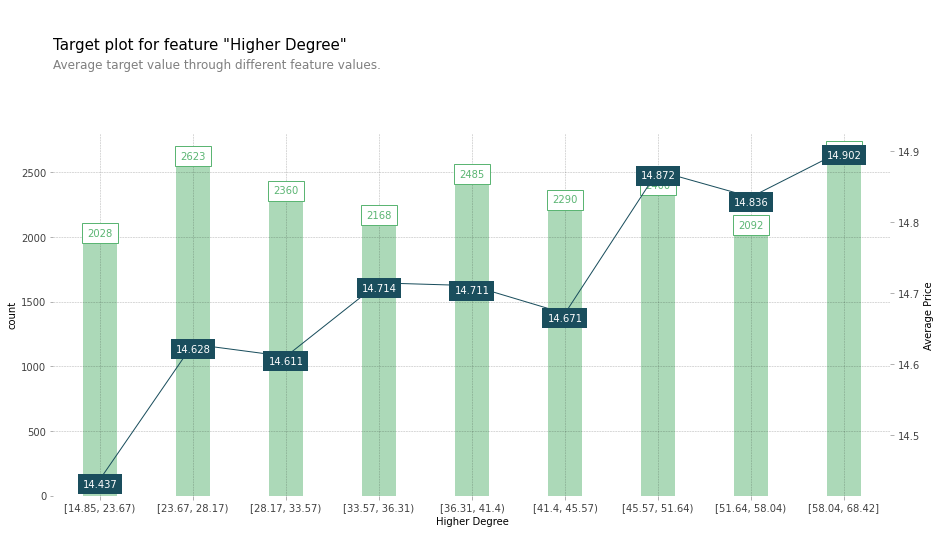

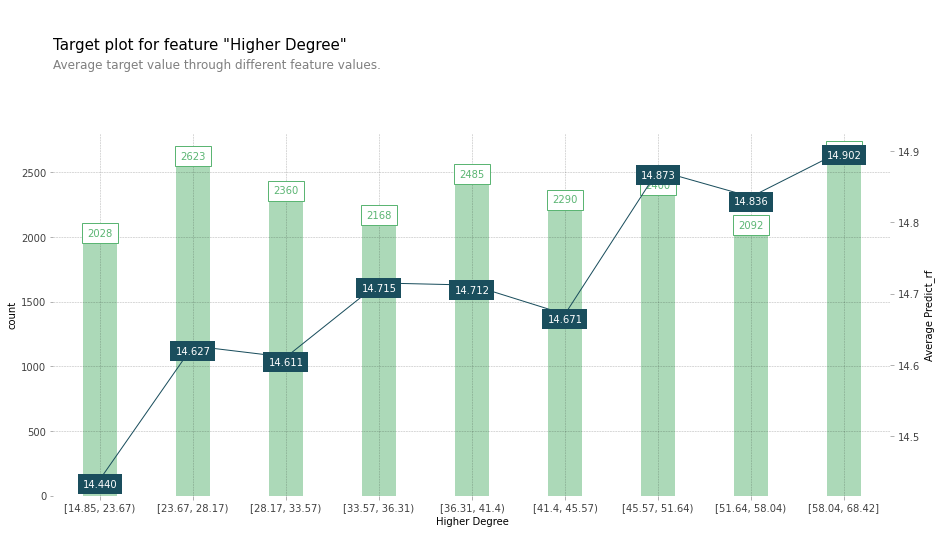

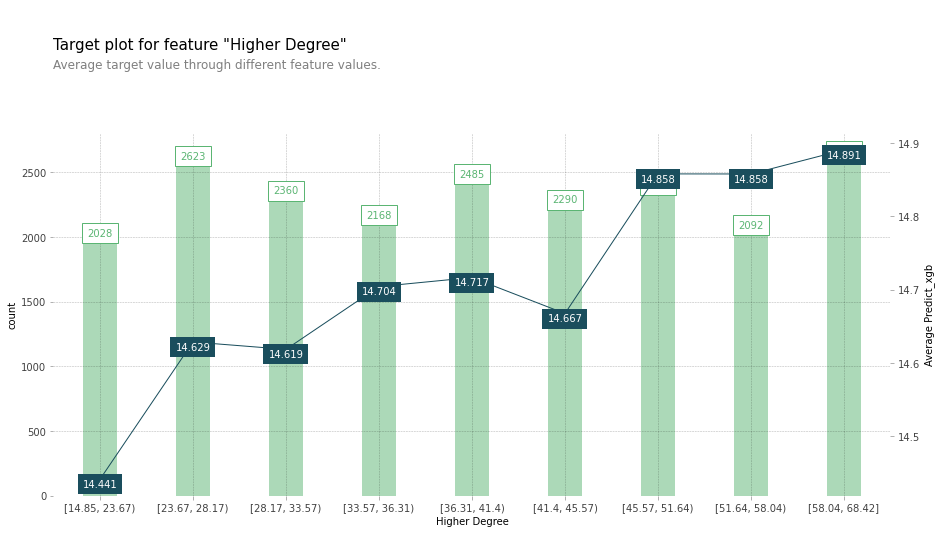

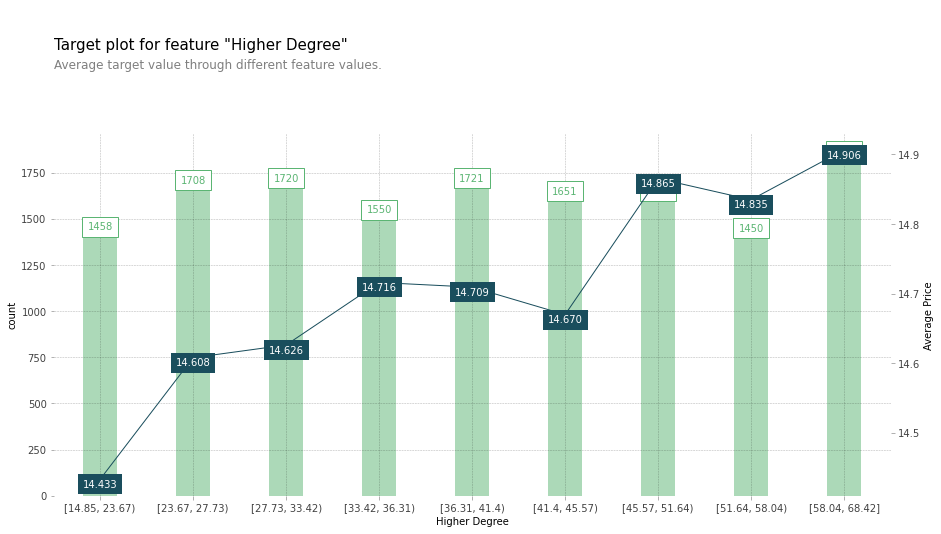

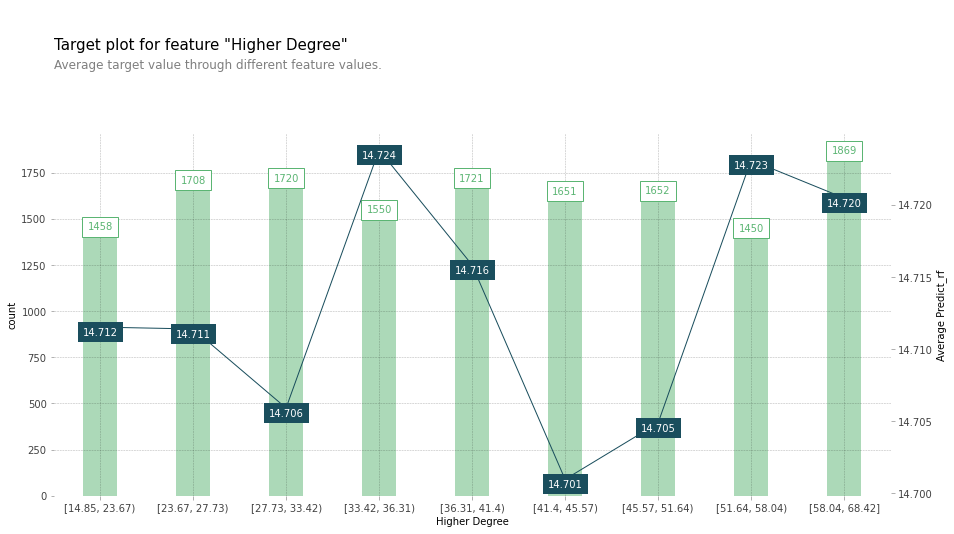

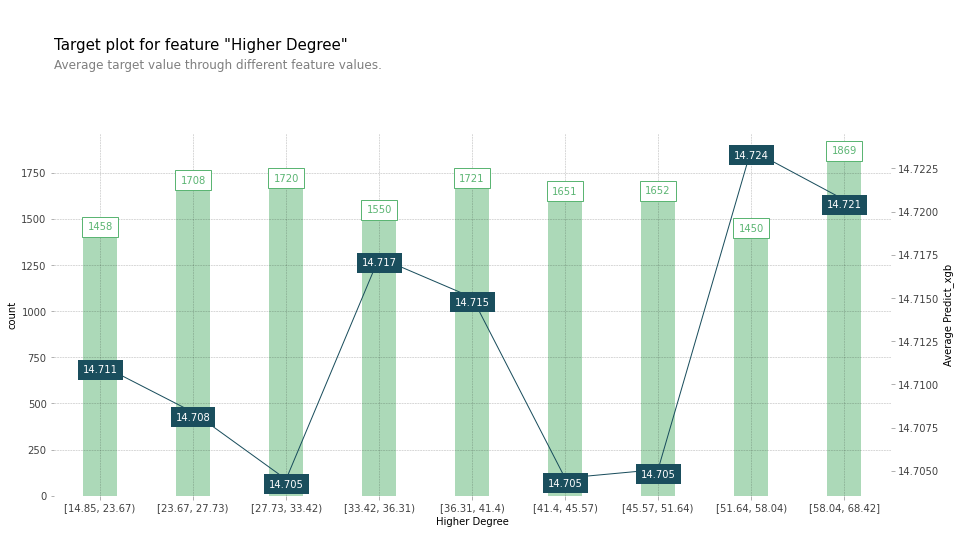

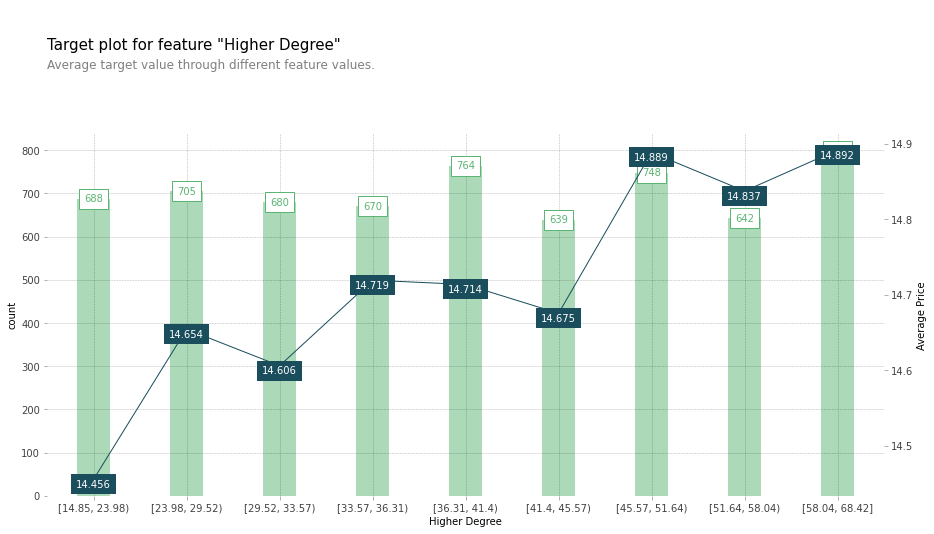

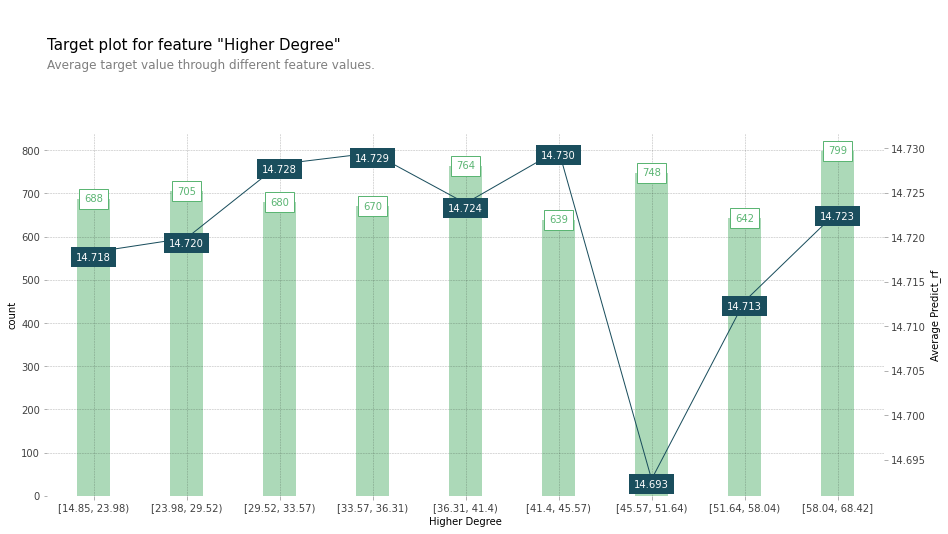

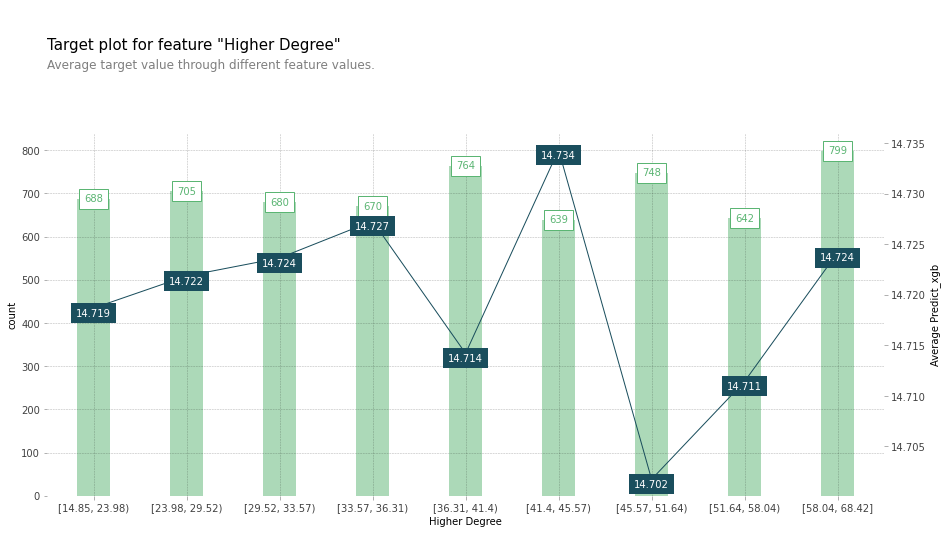

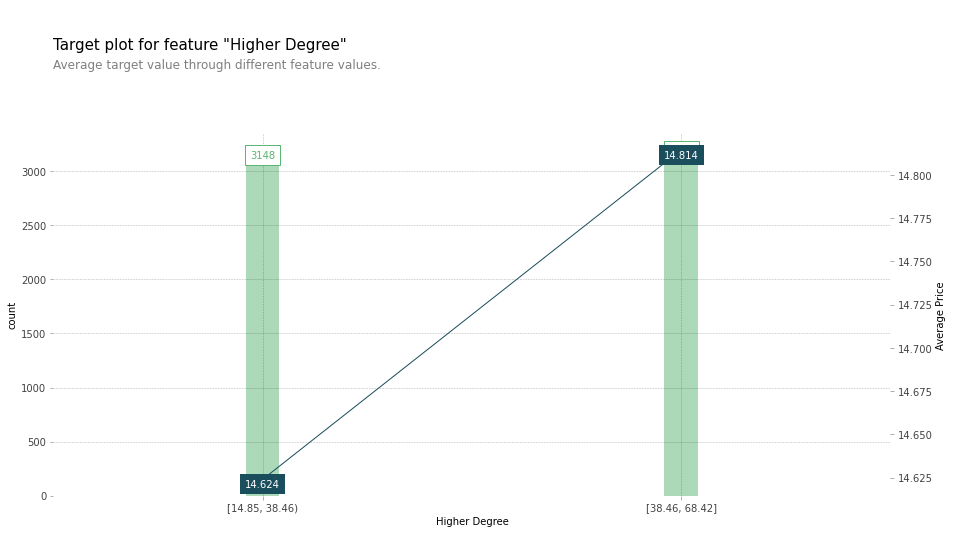

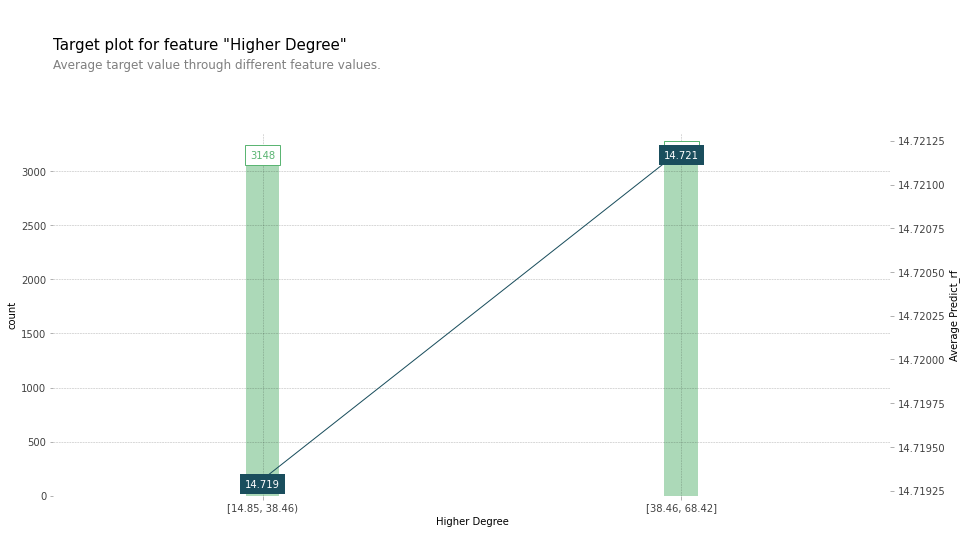

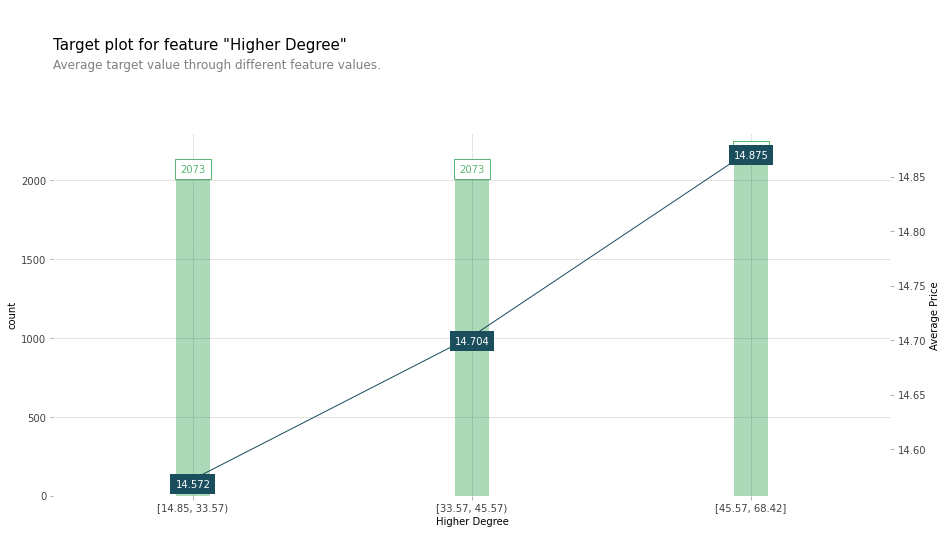

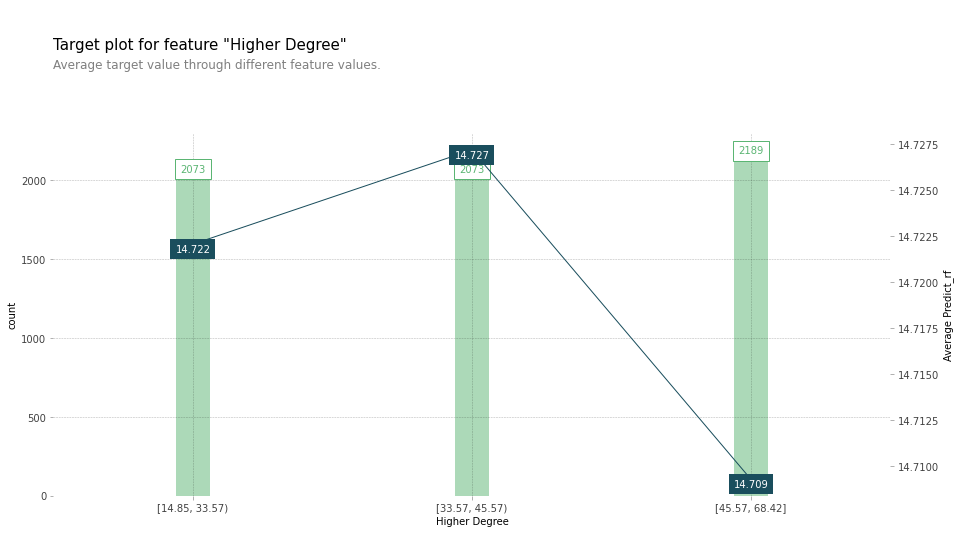

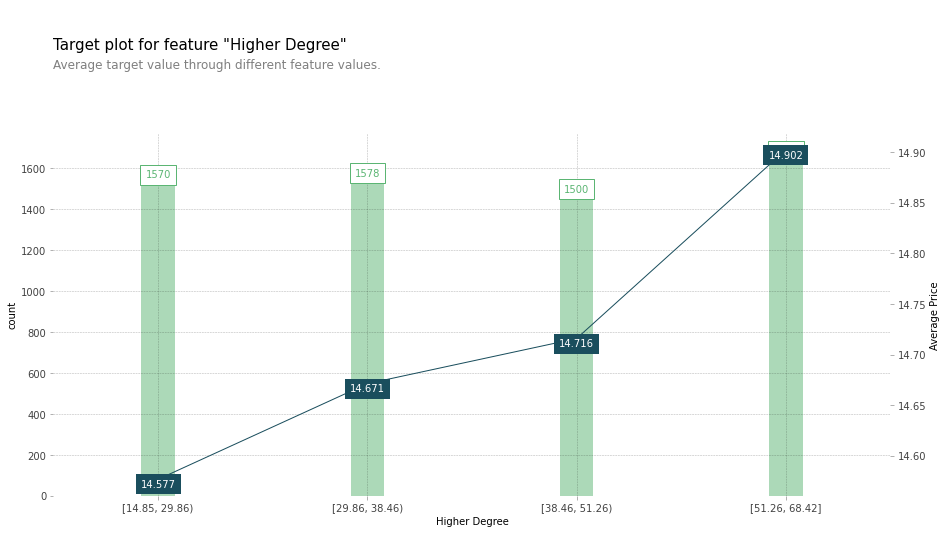

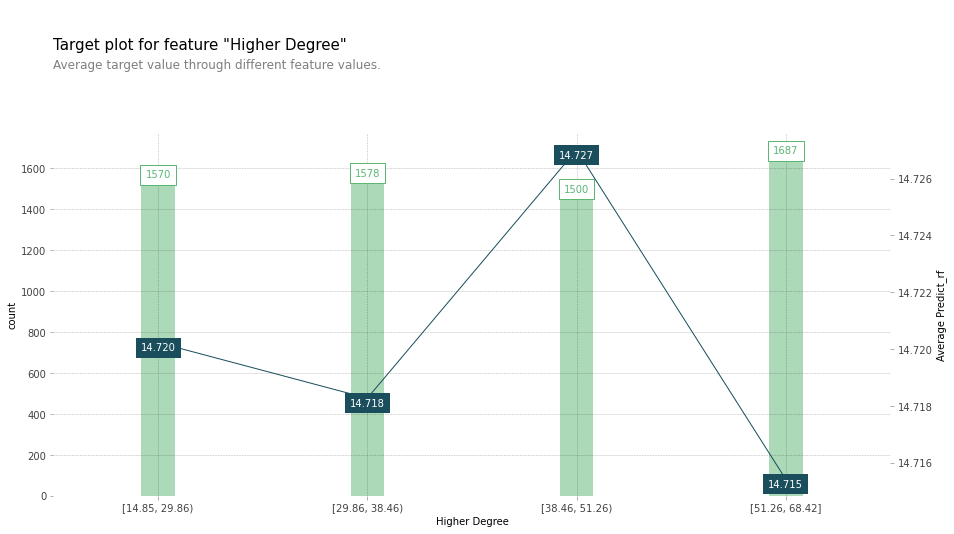

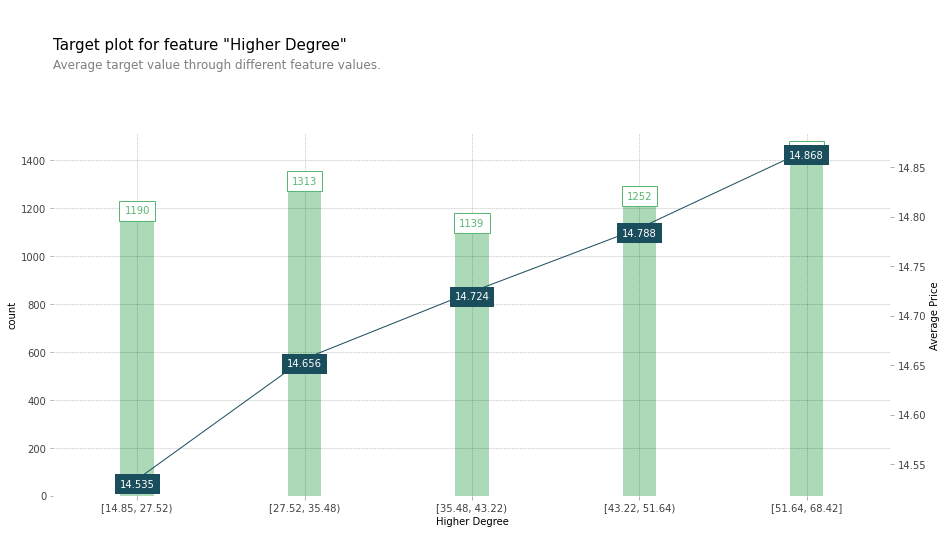

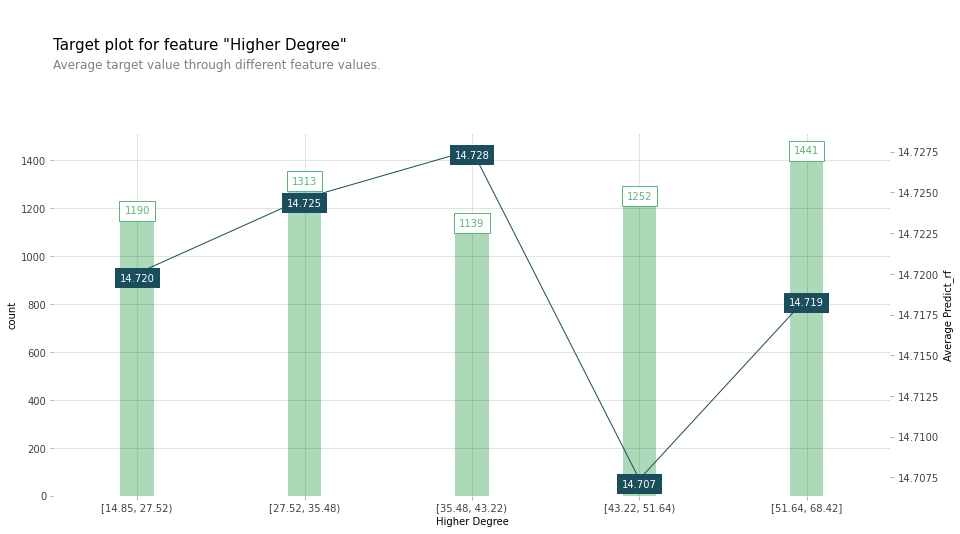

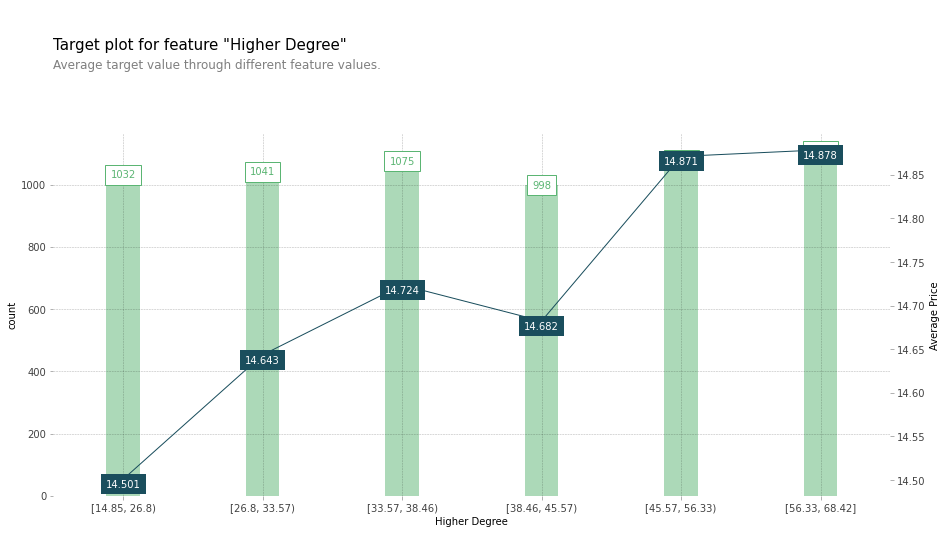

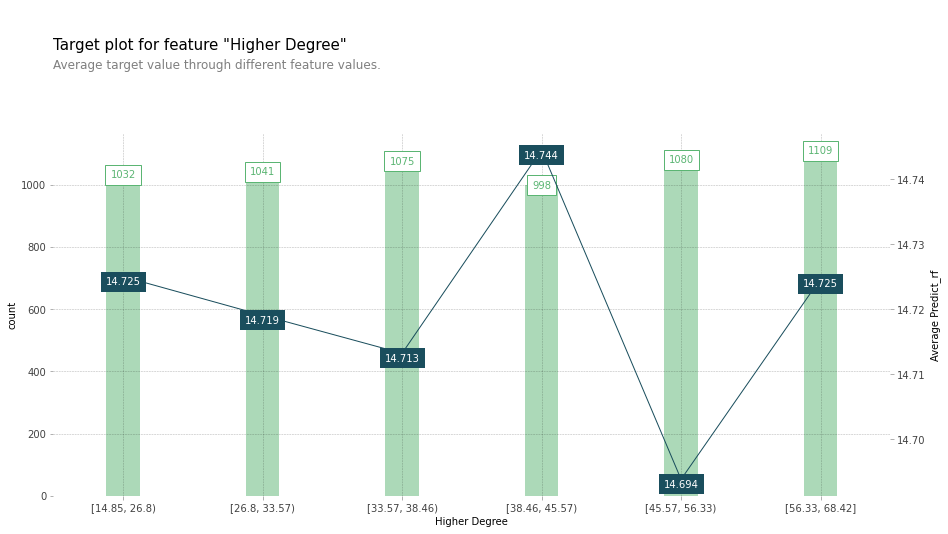

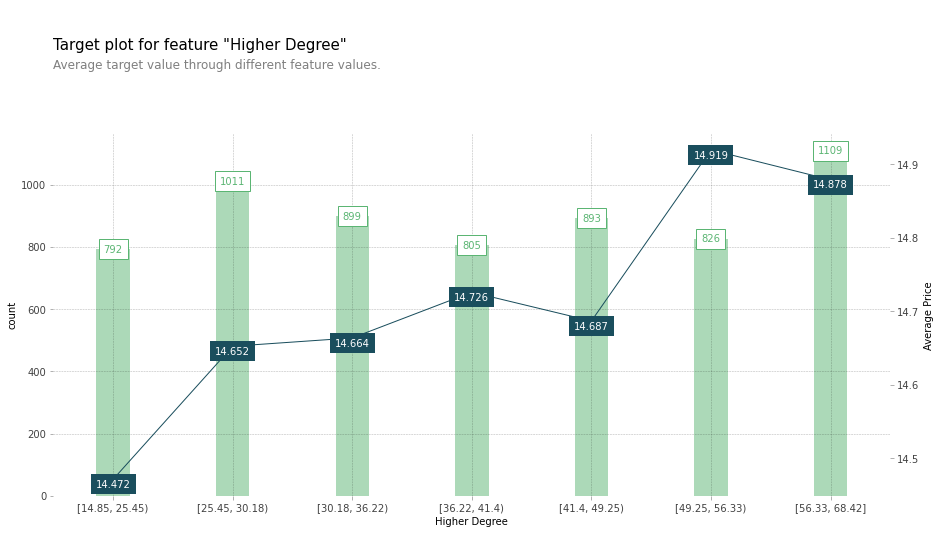

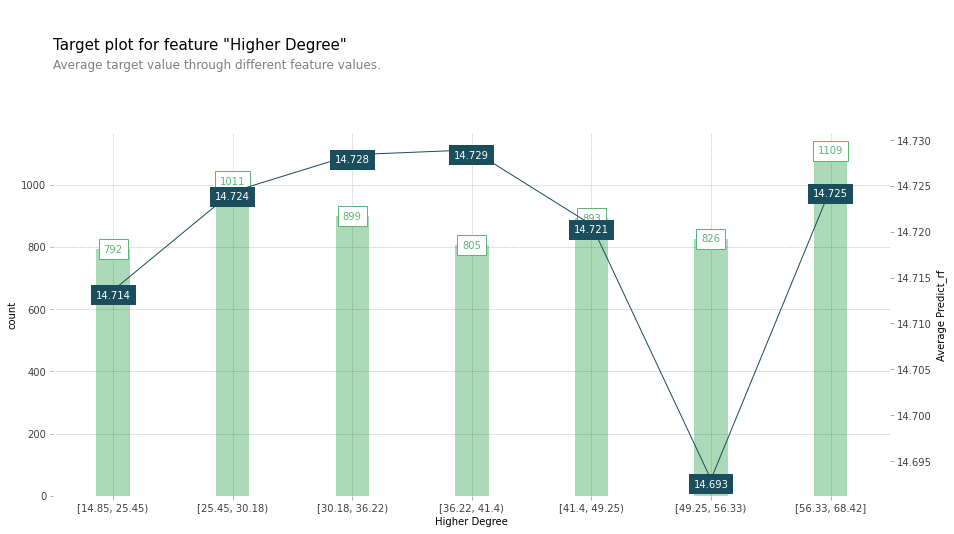

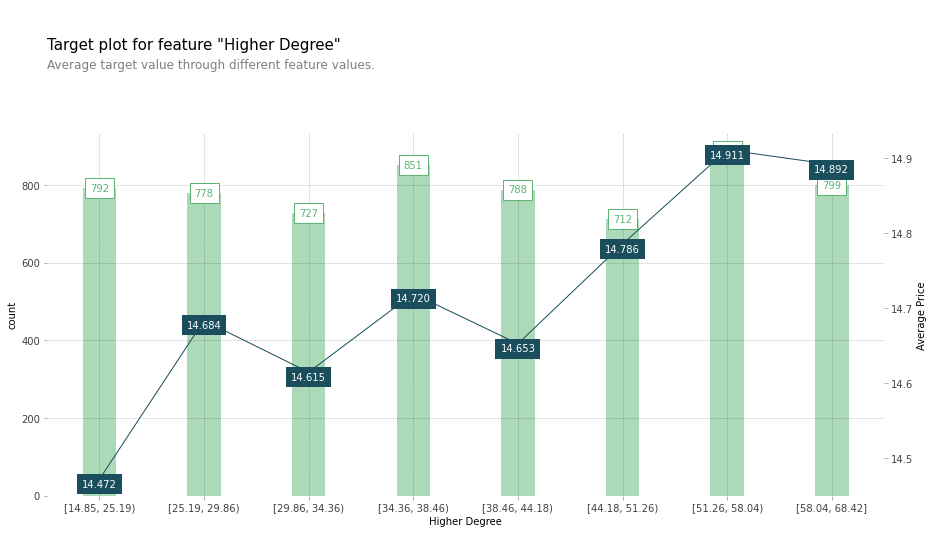

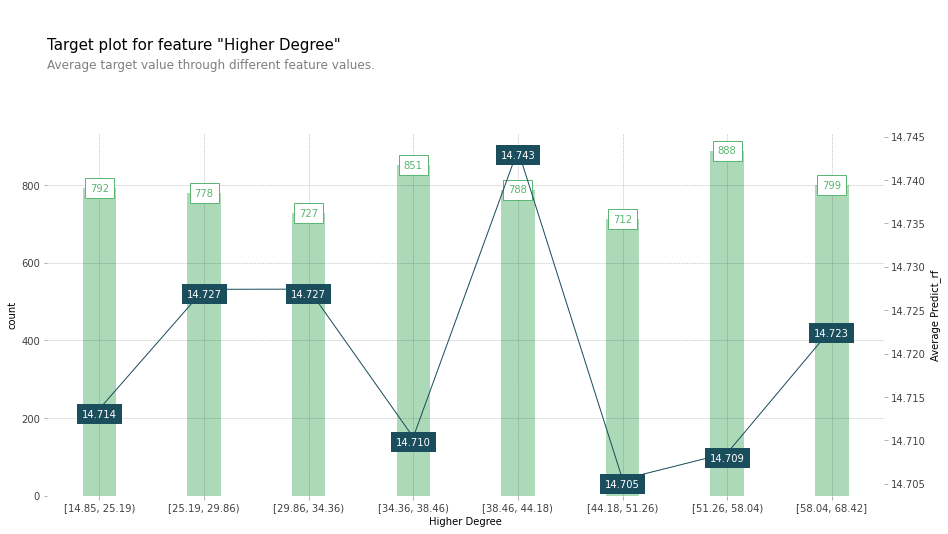

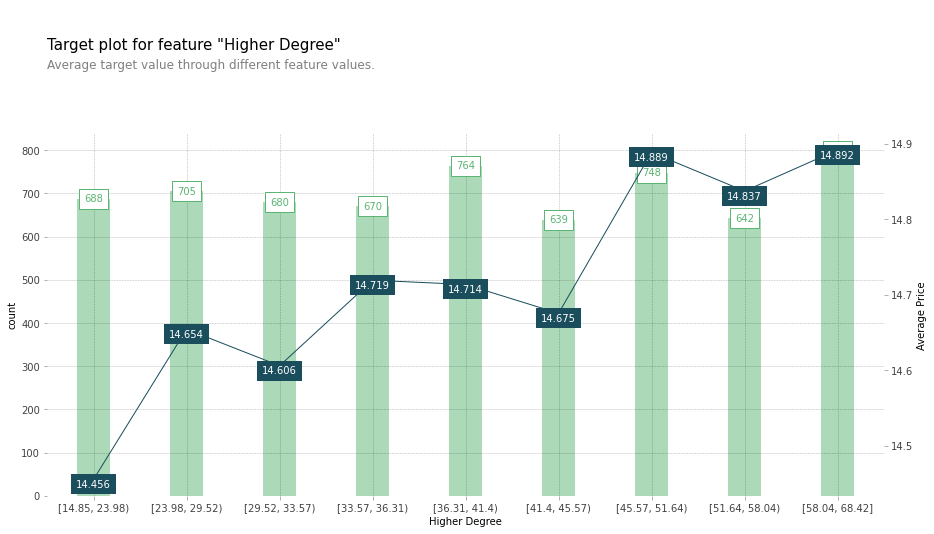

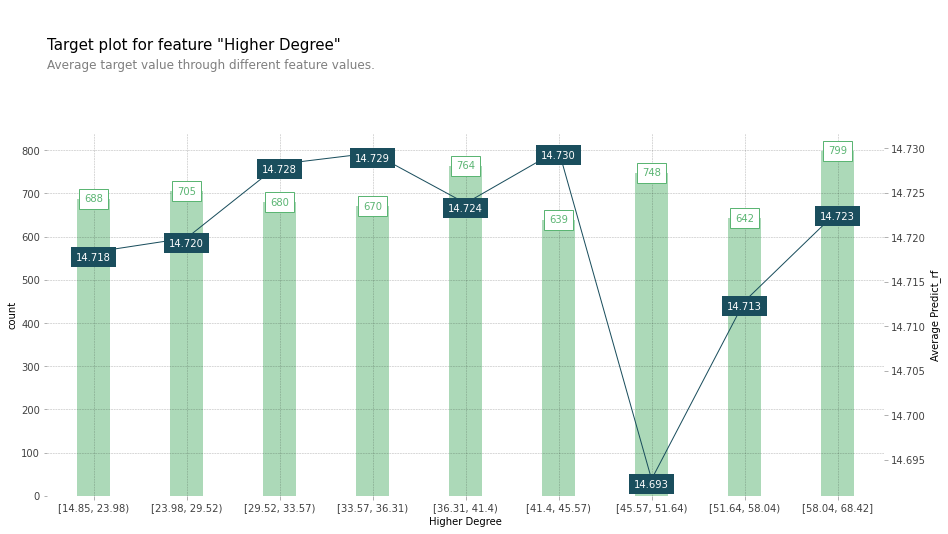

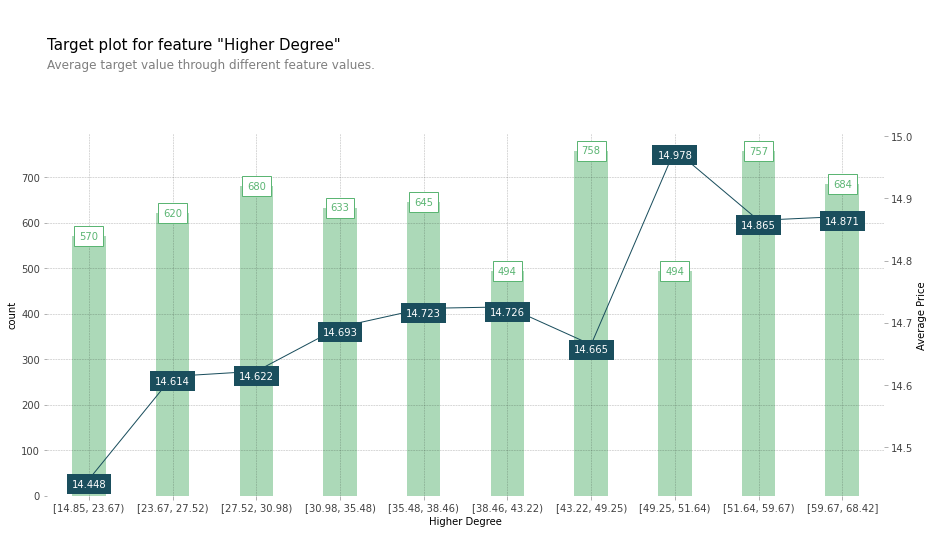

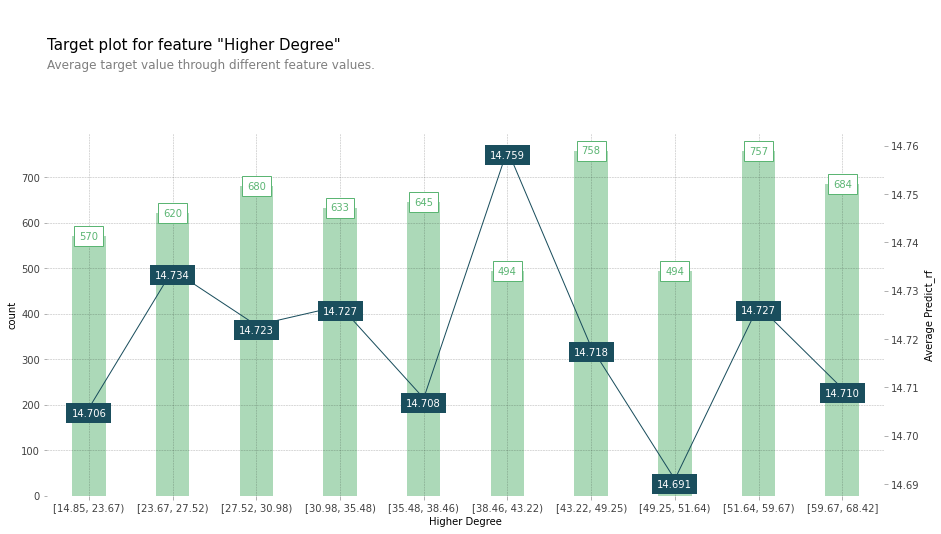

In [6]:
df, train, test, rf, xgb = setting('daejeon')
#===== Full dataset =====#
fig, axes, summary_df = info_plots.target_plot(
    df = df, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price' # 타겟
)

fig, axes, summary_df = info_plots.target_plot(
    df = df, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf' # 타겟
)

fig, axes, summary_df = info_plots.target_plot(
    df = df, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_xgb' # 타겟
)

#===== Train dataset =====#
fig, axes, summary_df = info_plots.target_plot(
    df = train, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price' # 타겟
)

fig, axes, summary_df = info_plots.target_plot(
    df = train, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf' # 타겟
)

fig, axes, summary_df = info_plots.target_plot(
    df = train, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_xgb' # 타겟
)

#===== Test dataset =====#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price' # 타겟
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf' # 타겟
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_xgb' # 타겟
)

#===== Test dataset with 2 or 3 interval =====#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price', # 타겟
    num_grid_points= 3
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf', # 타겟
    num_grid_points= 3
)

#=============================================#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price', # 타겟
    num_grid_points= 4
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf', # 타겟
    num_grid_points= 4
)

#=============================================#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price', # 타겟
    num_grid_points= 5
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf', # 타겟
    num_grid_points= 5
)

#=============================================#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price', # 타겟
    num_grid_points= 6
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf', # 타겟
    num_grid_points= 6
)

#=============================================#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price', # 타겟
    num_grid_points= 7
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf', # 타겟
    num_grid_points= 7
)

#=============================================#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price', # 타겟
    num_grid_points= 8
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf', # 타겟
    num_grid_points= 8
)

#=============================================#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price', # 타겟
    num_grid_points= 9
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf', # 타겟
    num_grid_points= 9
)

#=============================================#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price', # 타겟
    num_grid_points= 10
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf', # 타겟
    num_grid_points= 10
)

#=============================================#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price', # 타겟
    num_grid_points= 11
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf', # 타겟
    num_grid_points= 11
)

## Gwangju

[10:24:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/pdpbox/info_plot_utils.py:179: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(width, height))
/usr/local/lib/python3.7/dist-packages/pdpbox/info_plot_utils.py:179: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(width, height))
/usr/local/lib/python3.7/dist-packages/pdpbox/info_plot_utils.py:179: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly close

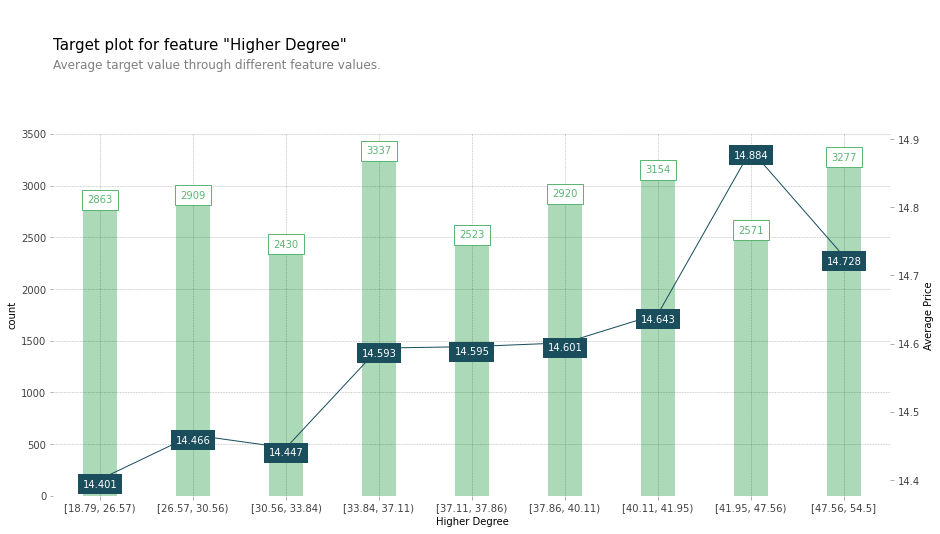

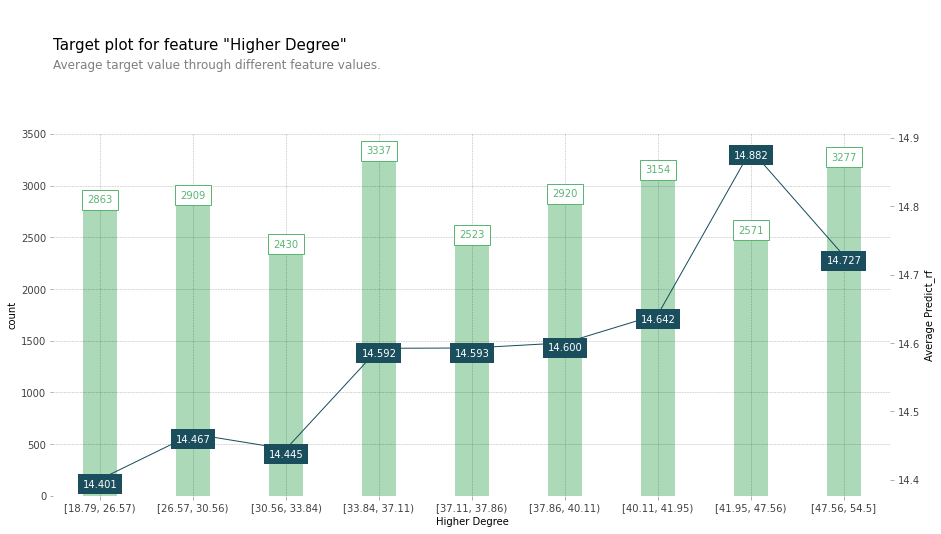

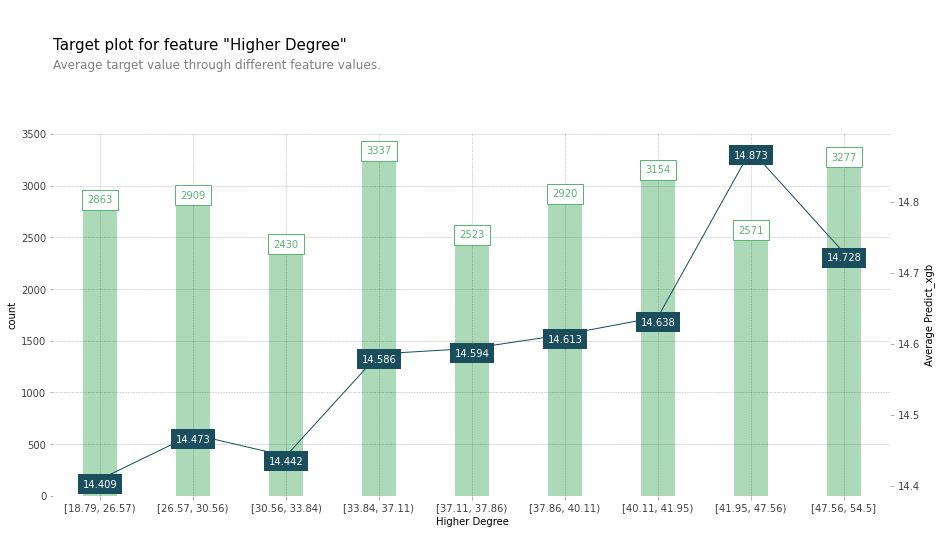

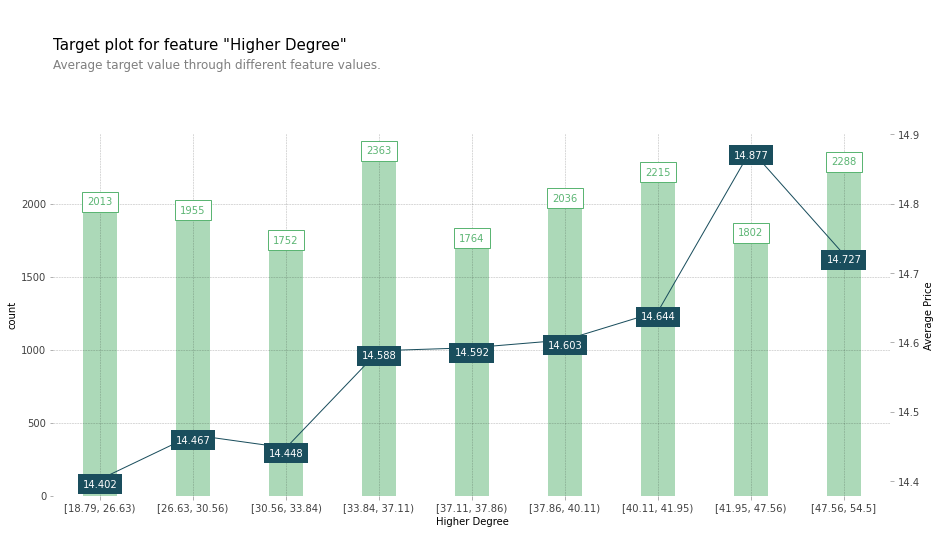

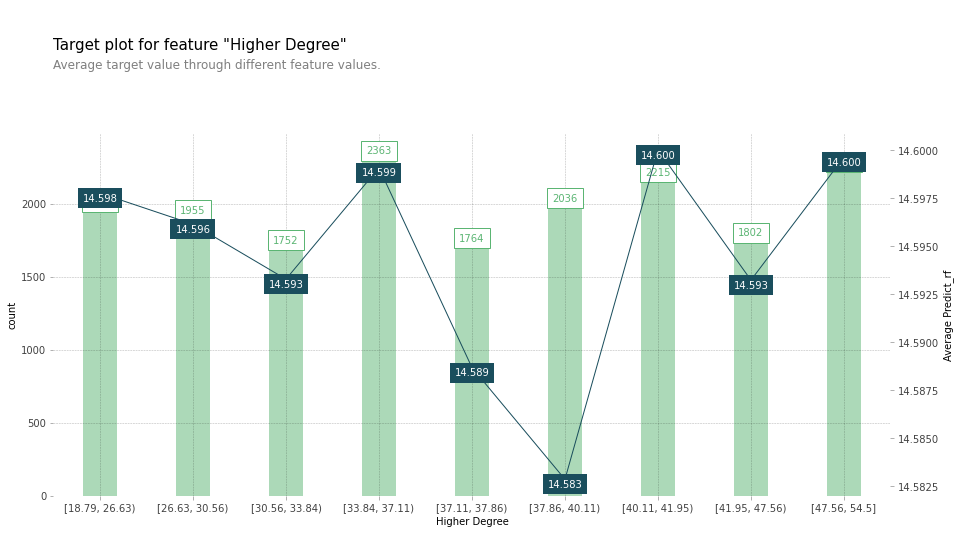

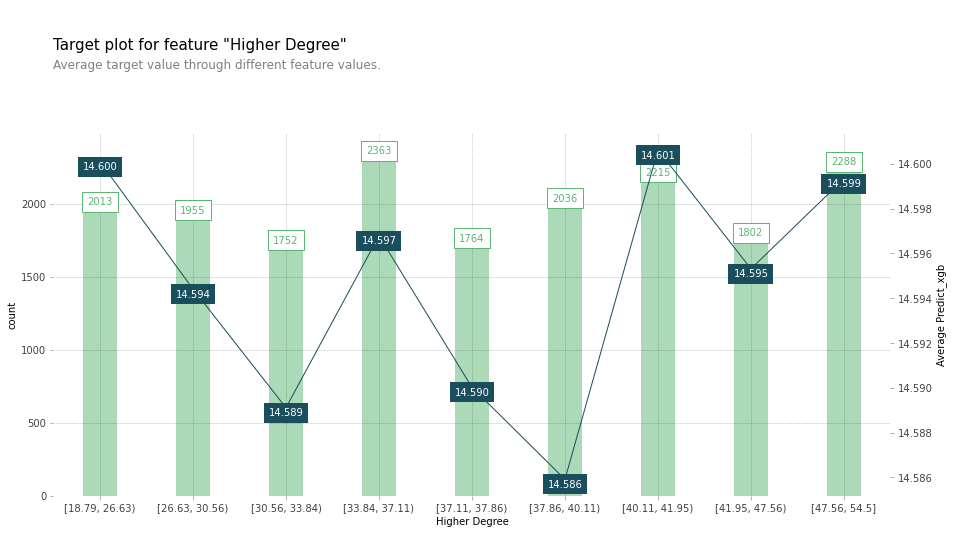

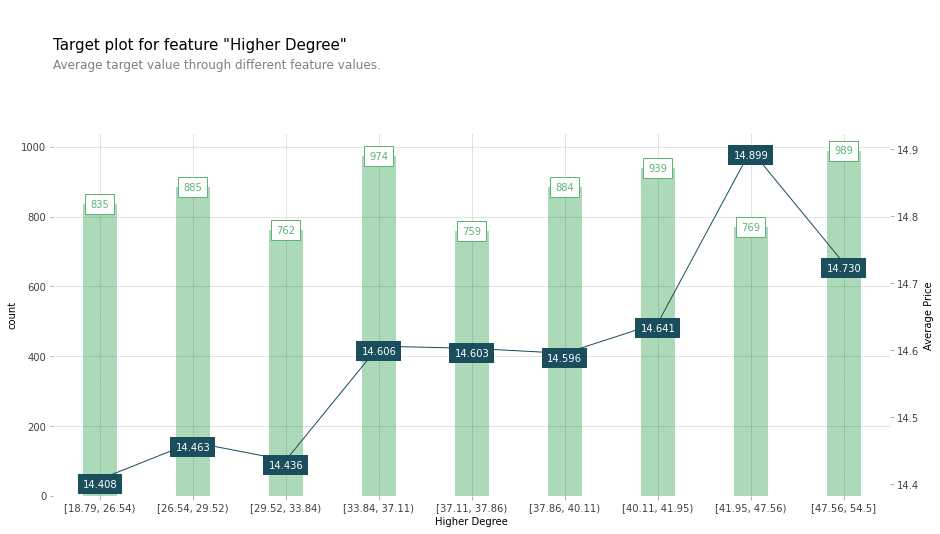

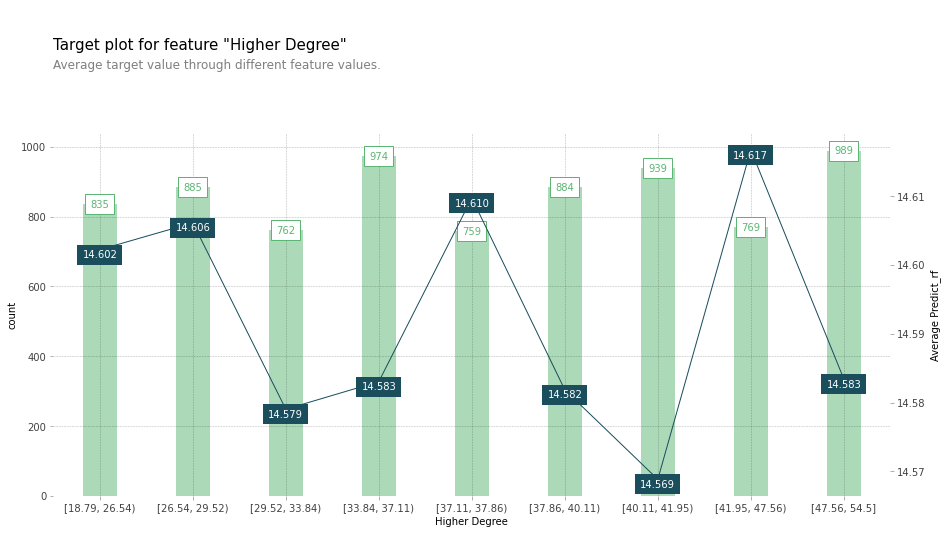

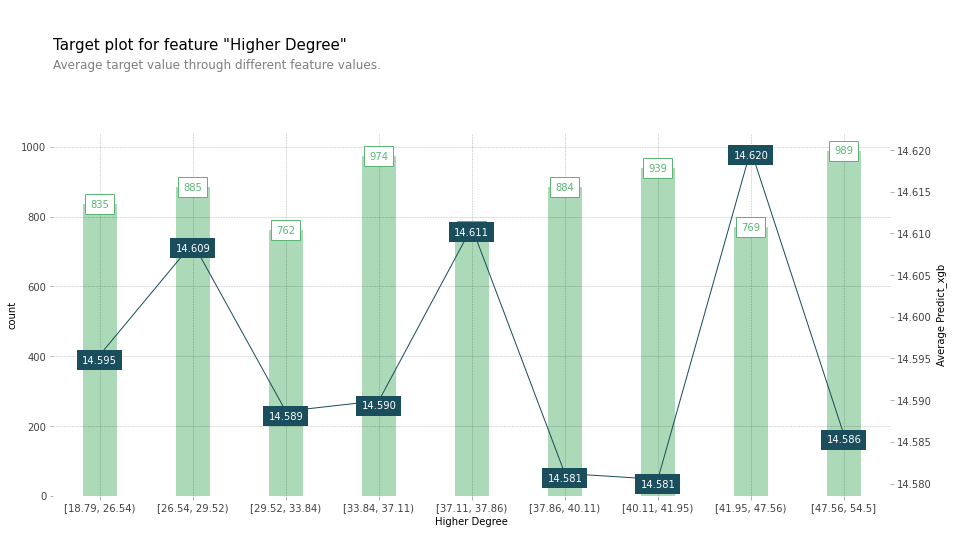

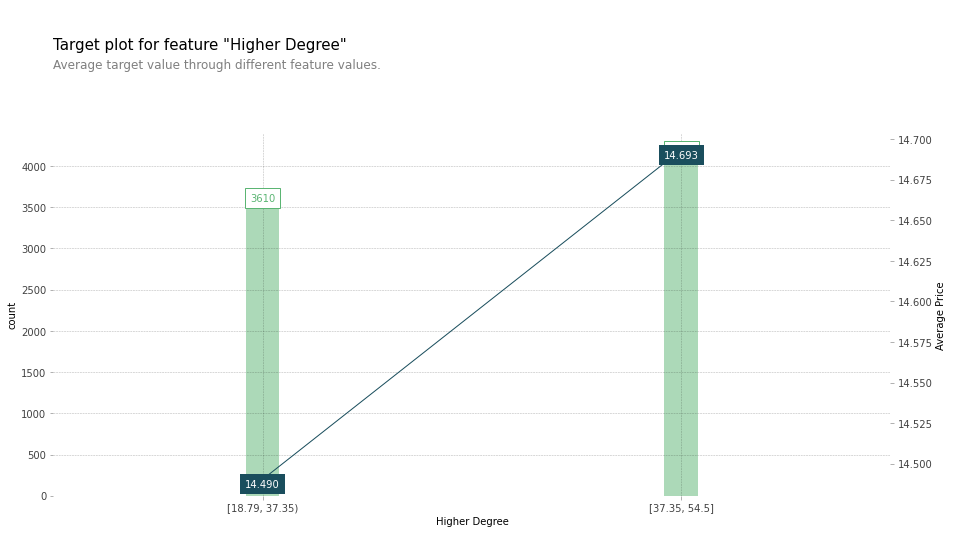

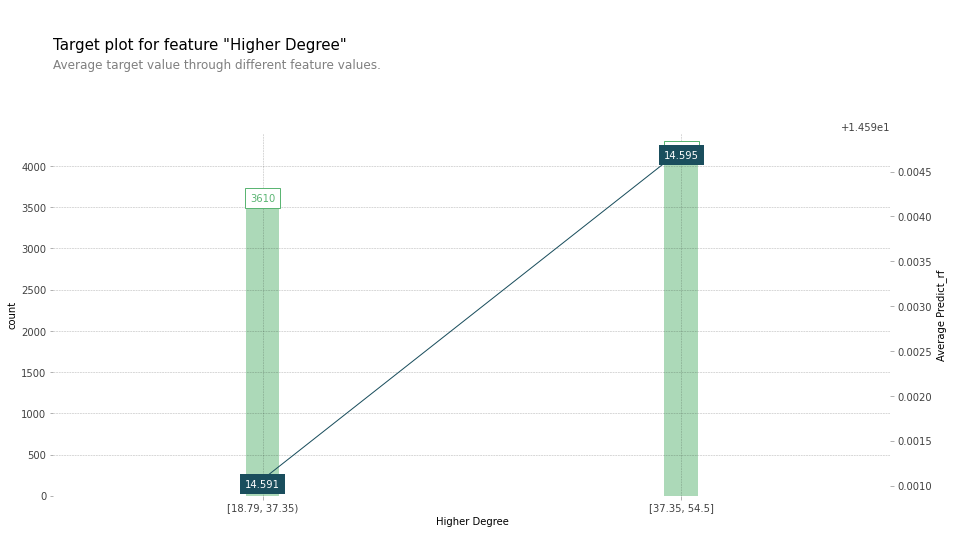

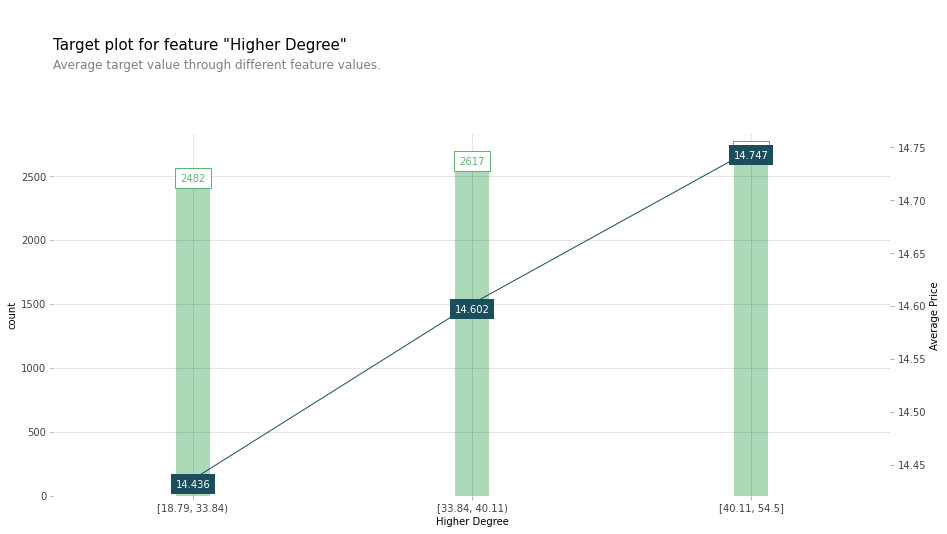

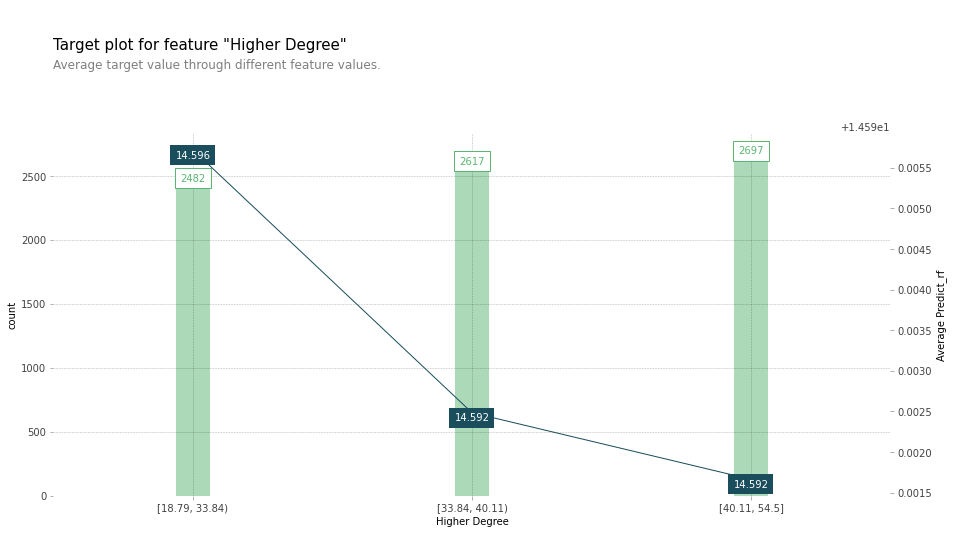

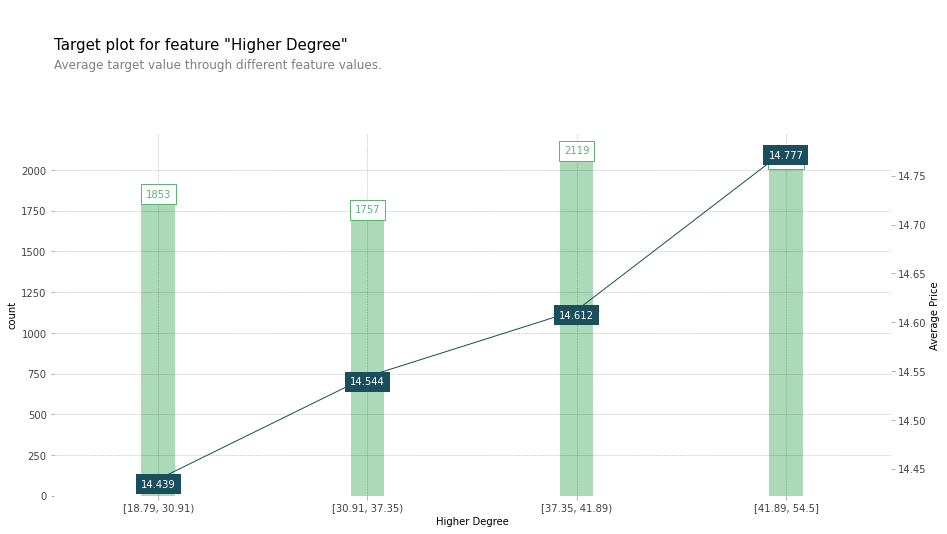

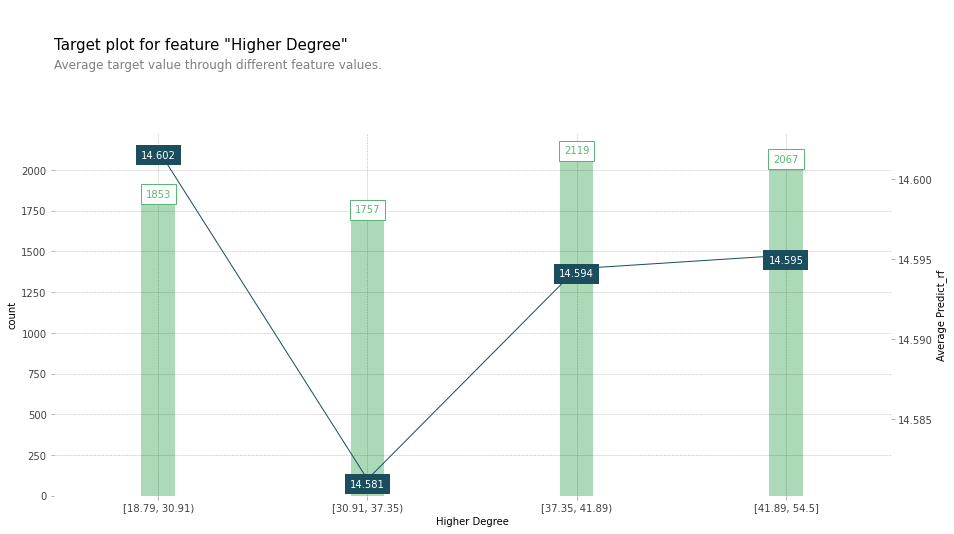

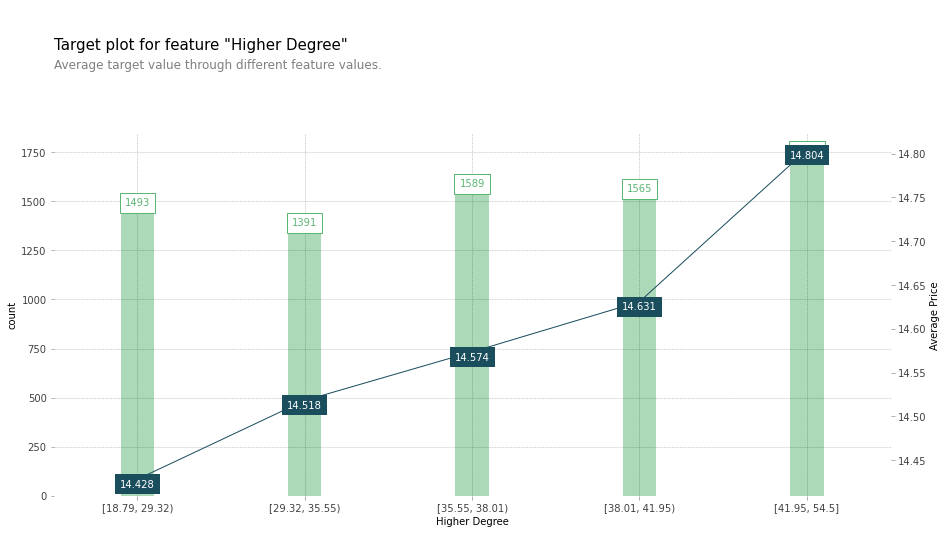

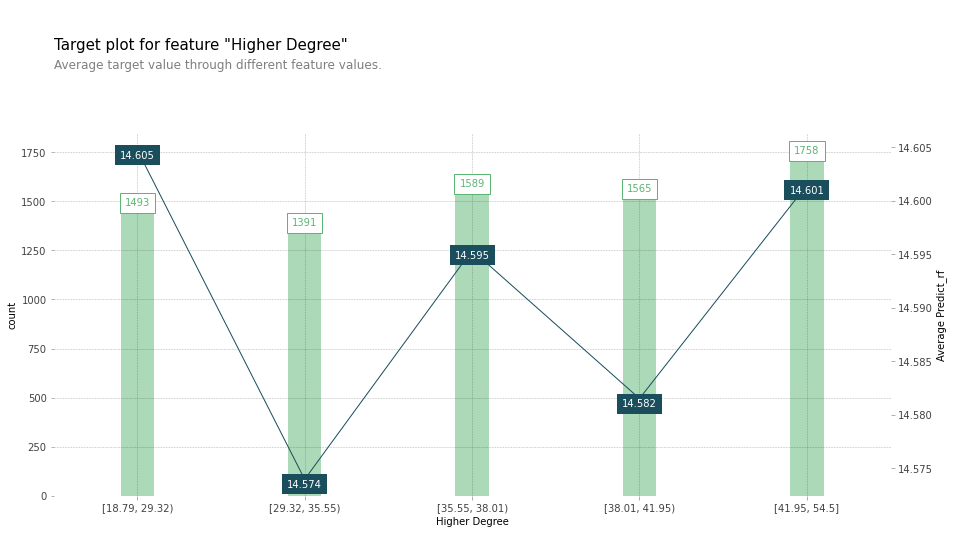

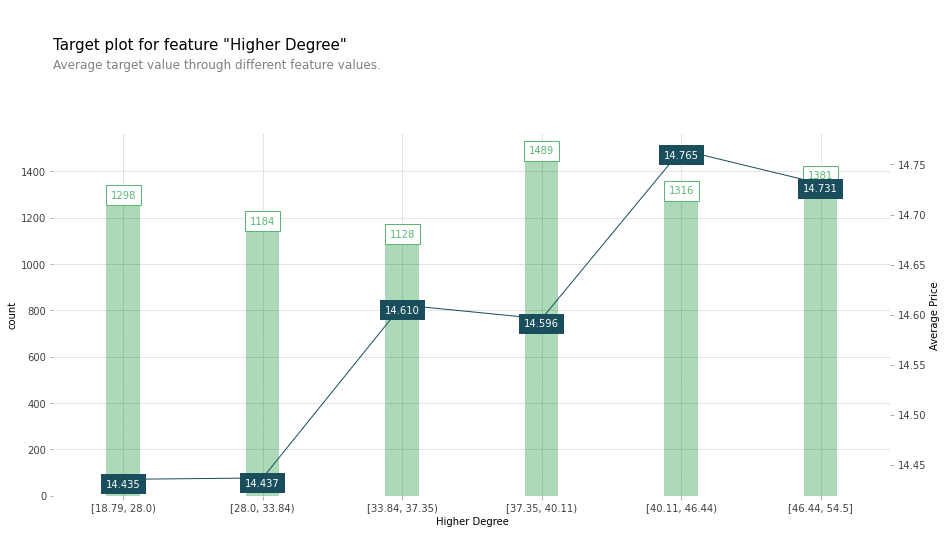

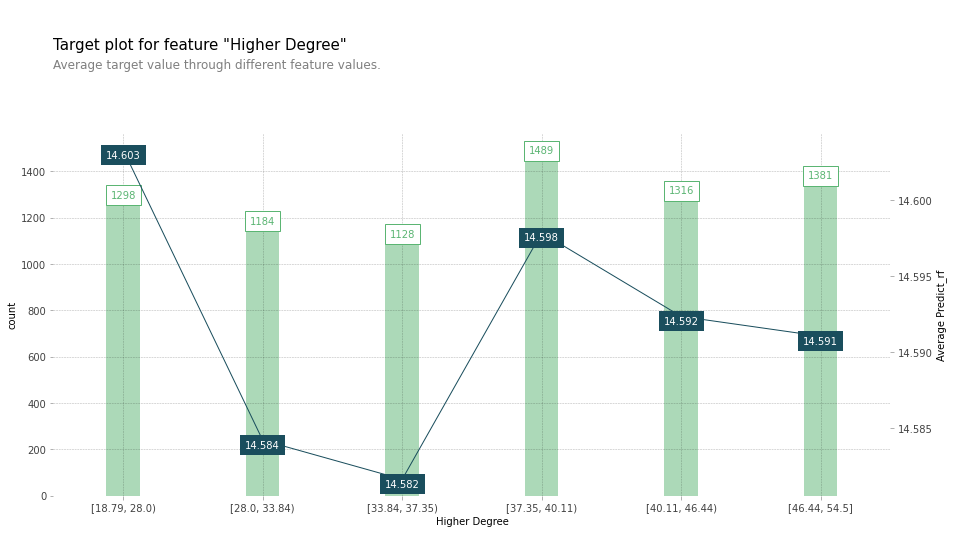

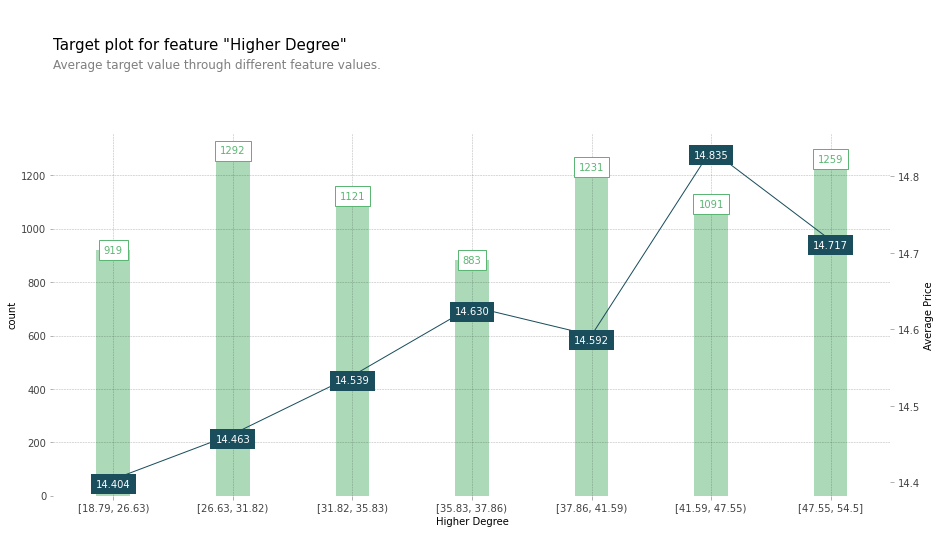

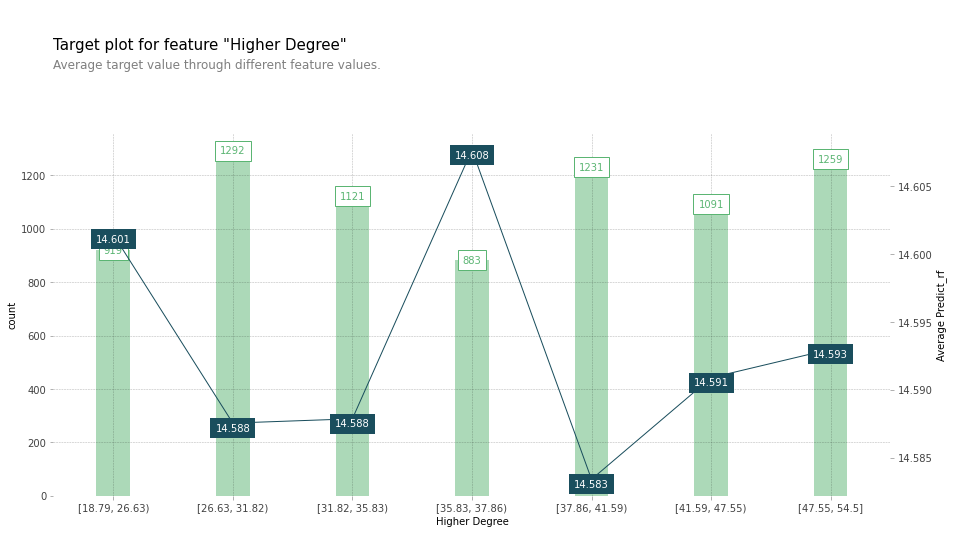

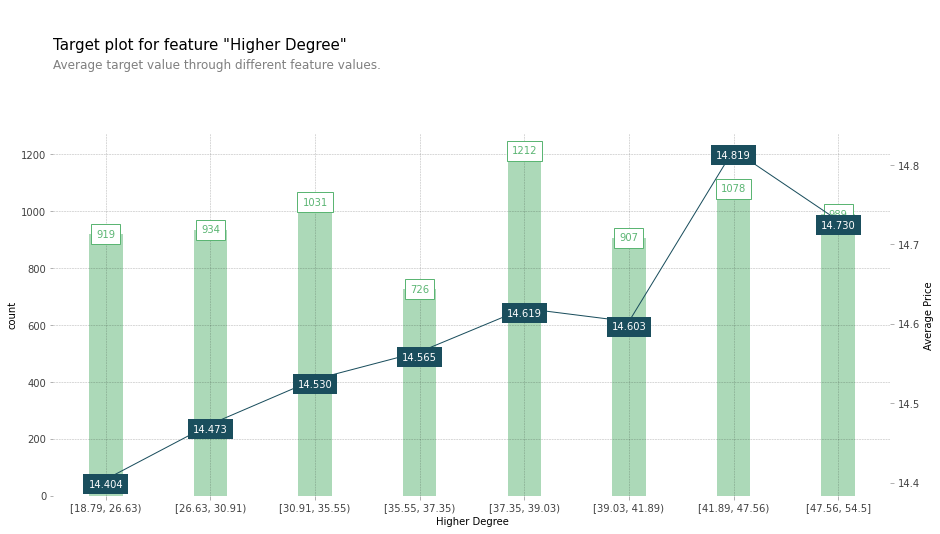

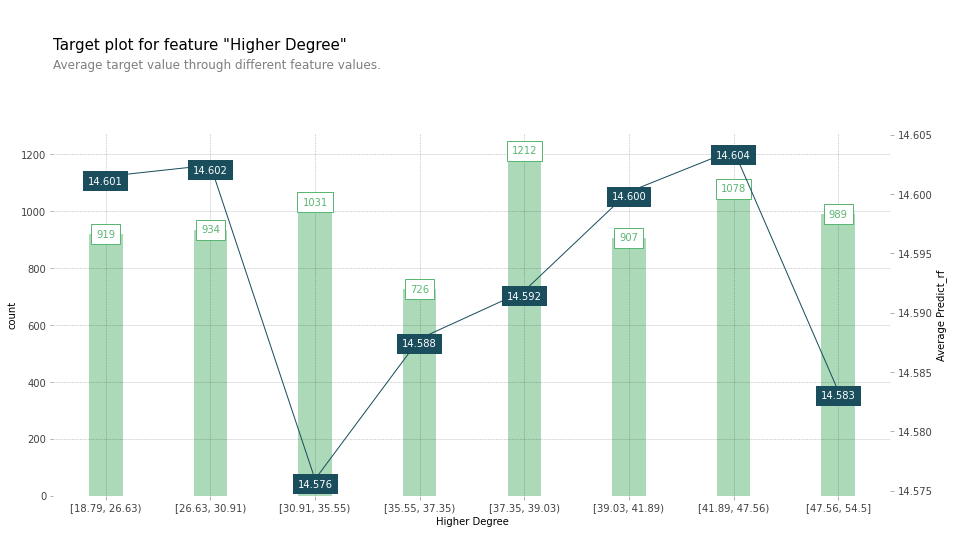

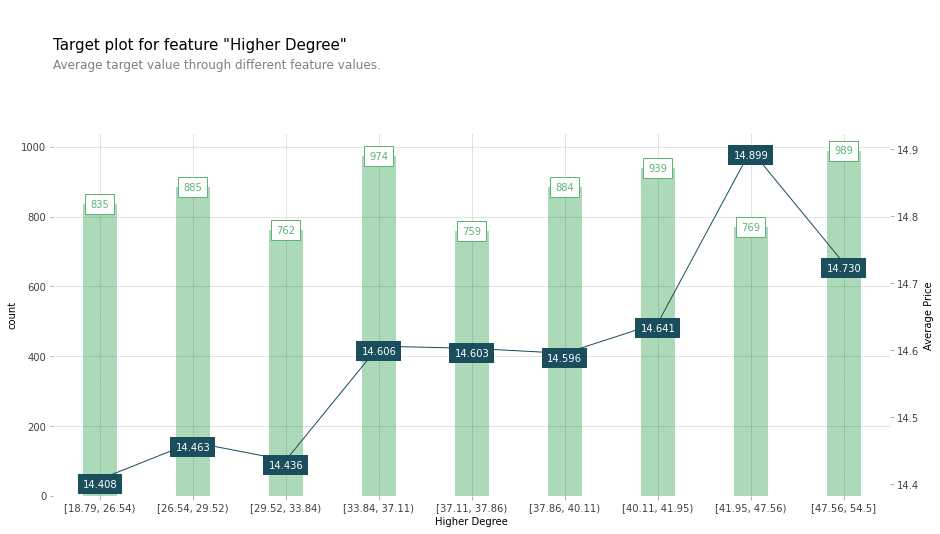

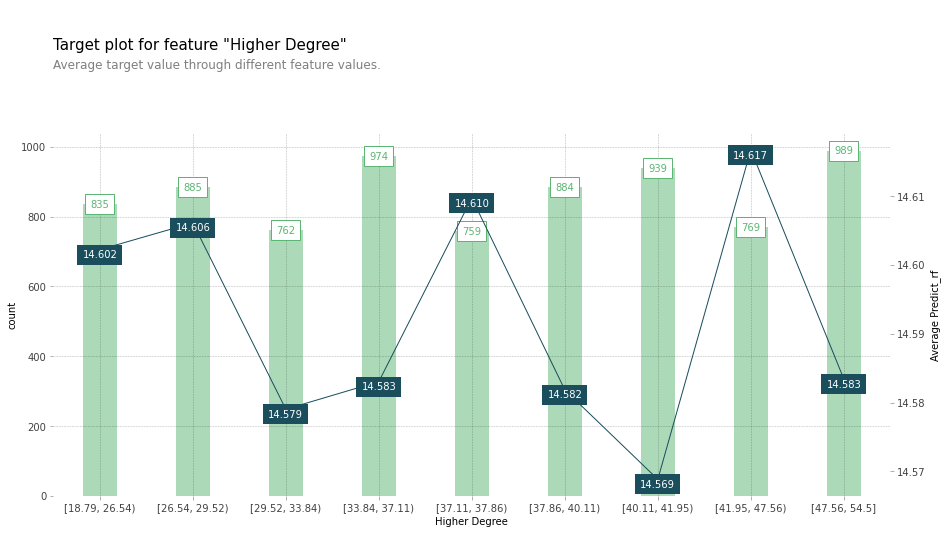

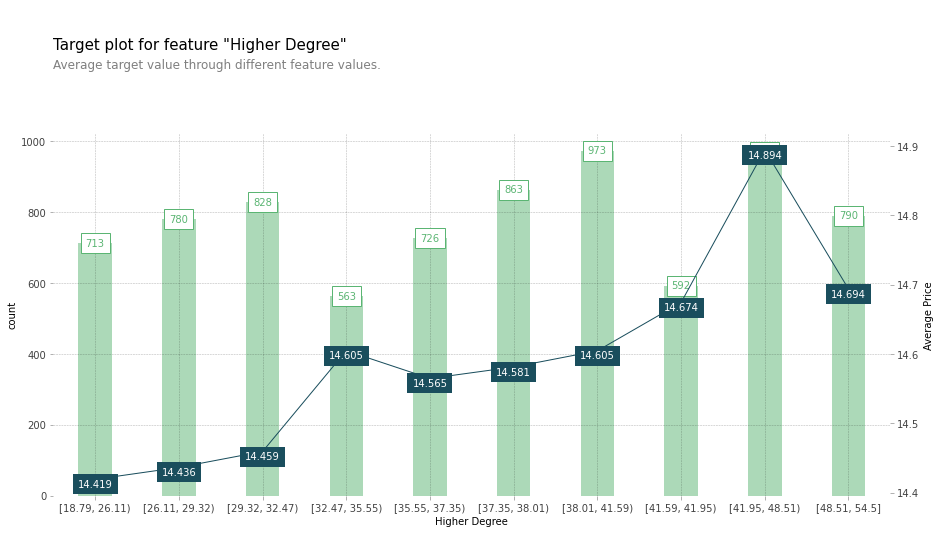

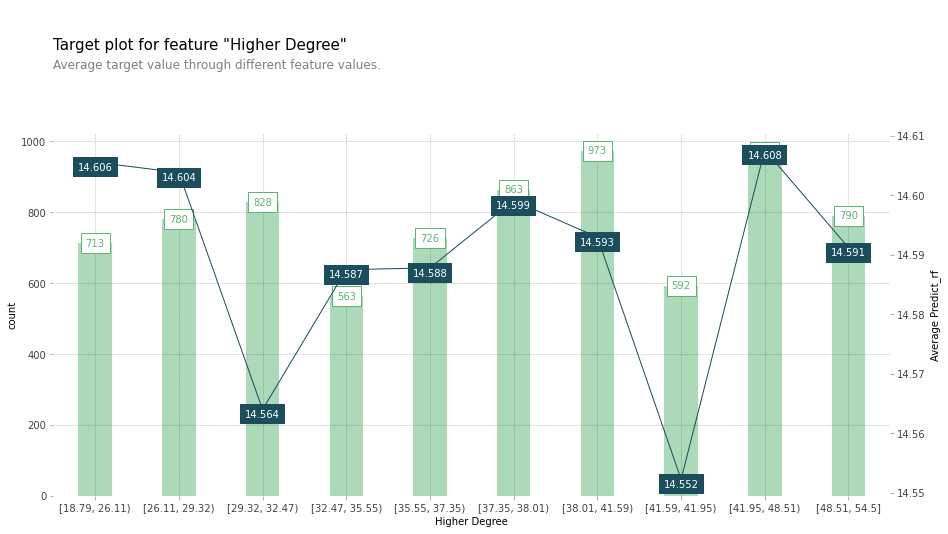

In [7]:
df, train, test, rf, xgb = setting('gwangju')
#===== Full dataset =====#
fig, axes, summary_df = info_plots.target_plot(
    df = df, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price' # 타겟
)

fig, axes, summary_df = info_plots.target_plot(
    df = df, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf' # 타겟
)

fig, axes, summary_df = info_plots.target_plot(
    df = df, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_xgb' # 타겟
)

#===== Train dataset =====#
fig, axes, summary_df = info_plots.target_plot(
    df = train, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price' # 타겟
)

fig, axes, summary_df = info_plots.target_plot(
    df = train, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf' # 타겟
)

fig, axes, summary_df = info_plots.target_plot(
    df = train, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_xgb' # 타겟
)

#===== Test dataset =====#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price' # 타겟
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf' # 타겟
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_xgb' # 타겟
)

#===== Test dataset with 2 or 3 interval =====#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price', # 타겟
    num_grid_points= 3
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf', # 타겟
    num_grid_points= 3
)

#=============================================#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price', # 타겟
    num_grid_points= 4
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf', # 타겟
    num_grid_points= 4
)

#=============================================#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price', # 타겟
    num_grid_points= 5
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf', # 타겟
    num_grid_points= 5
)

#=============================================#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price', # 타겟
    num_grid_points= 6
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf', # 타겟
    num_grid_points= 6
)

#=============================================#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price', # 타겟
    num_grid_points= 7
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf', # 타겟
    num_grid_points= 7
)

#=============================================#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price', # 타겟
    num_grid_points= 8
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf', # 타겟
    num_grid_points= 8
)

#=============================================#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price', # 타겟
    num_grid_points= 9
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf', # 타겟
    num_grid_points= 9
)

#=============================================#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price', # 타겟
    num_grid_points= 10
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf', # 타겟
    num_grid_points= 10
)

#=============================================#
fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Price', # 타겟
    num_grid_points= 11
)

fig, axes, summary_df = info_plots.target_plot(
    df = test, # 피쳐 + 타겟 데이터
    feature = 'Higher Degree', # 피쳐
    feature_name = 'Higher Degree', # 표시할 이름
    target = 'Predict_rf', # 타겟
    num_grid_points= 11
)